In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import requests, zipfile, io
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

EXTRACTING THE ZIP FILE FROM THE URL

In [3]:
zip_file_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00495/data.zip"
req = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(req.content))

READING THE EXTRACTED ZIP FILE WHICH IS IN THE FORM OF PKL FILE

In [4]:
datafile = [file for file in z.namelist() if file.endswith('.pkl')]
resultfile = {}
for pkl_file in datafile:
    with z.open(pkl_file) as file:
        data = pickle.load(file, encoding='latin1')
        resultfile[pkl_file] = data
        print(f"Various categories available in the dataset are : {list(data.keys())}")
        print(f"Subject is: {data['subject']}")
        print(f"The categories of this subject are: {data['questionnaire']}")
        print("-----------------------------------------------------------------------------------------------------------------")
pkl_file = datafile[0]
data_pkl_file = resultfile[pkl_file]

Various categories available in the dataset are : ['rpeaks', 'signal', 'label', 'activity', 'questionnaire', 'subject']
Subject is: S10
The categories of this subject are: {'WEIGHT': 56.0, 'Gender': ' f', 'AGE': 55, 'HEIGHT': 164.0, 'SKIN': 4, 'SPORT': 5}
-----------------------------------------------------------------------------------------------------------------
Various categories available in the dataset are : ['rpeaks', 'signal', 'label', 'activity', 'questionnaire', 'subject']
Subject is: S11
The categories of this subject are: {'WEIGHT': 62.0, 'Gender': ' f', 'AGE': 24, 'HEIGHT': 168.0, 'SKIN': 3, 'SPORT': 5}
-----------------------------------------------------------------------------------------------------------------
Various categories available in the dataset are : ['rpeaks', 'signal', 'label', 'activity', 'questionnaire', 'subject']
Subject is: S12
The categories of this subject are: {'WEIGHT': 105.0, 'Gender': ' m', 'AGE': 43, 'HEIGHT': 195.0, 'SKIN': 3, 'SPORT': 5}
---

In [5]:
DF = pd.DataFrame.from_dict(resultfile)
DF

,PPG_FieldStudy/S10/S10.pkl,PPG_FieldStudy/S11/S11.pkl,PPG_FieldStudy/S12/S12.pkl,PPG_FieldStudy/S13/S13.pkl,PPG_FieldStudy/S14/S14.pkl,PPG_FieldStudy/S15/S15.pkl,PPG_FieldStudy/S1/S1.pkl,PPG_FieldStudy/S2/S2.pkl,PPG_FieldStudy/S3/S3.pkl,PPG_FieldStudy/S4/S4.pkl,PPG_FieldStudy/S5/S5.pkl,PPG_FieldStudy/S6/S6.pkl,PPG_FieldStudy/S7/S7.pkl,PPG_FieldStudy/S8/S8.pkl,PPG_FieldStudy/S9/S9.pkl
rpeaks,"[560, 1194, 1851, 2503, 3168, 3800, 4448, 5137...","[553, 1181, 1804, 2417, 3009, 3591, 4121, 4655...","[669, 1496, 2303, 3089, 3838, 4552, 5267, 5989...","[226, 961, 1673, 2376, 2968, 3585, 4253, 4867,...","[7, 707, 1377, 2028, 2629, 3162, 3678, 4199, 4...","[506, 1267, 2097, 2945, 3778, 4607, 5380, 6170...","[240, 1174, 2128, 3099, 3907, 4733, 5404, 6382...","[33, 700, 1316, 1932, 2536, 3094, 3661, 4220, ...","[337, 1103, 1897, 2673, 3496, 4295, 5103, 5901...","[206, 910, 1510, 2150, 2768, 3331, 3911, 4505,...","[71, 519, 976, 1440, 1874, 2331, 2783, 3225, 3...","[31, 464, 891, 1313, 1726, 2132, 2534, 2924, 3...","[633, 1428, 2197, 2971, 3739, 4507, 5241, 5963...","[217, 960, 1697, 2433, 3116, 3836, 4560, 5297,...","[486, 1161, 1829, 2473, 3095, 3709, 4291, 4886..."
signal,{'chest': {'ACC': [[ 0.91760004 -0.01779997 -0...,{'chest': {'ACC': [[ 0.91779995 -0.0054 0...,{'chest': {'ACC': [[ 0.89100003 -0.01200002 -0...,{'chest': {'ACC': [[0.89300001 0.06099999 0.17...,{'chest': {'ACC': [[ 0.89300001 0.12619996 -0...,{'chest': {'ACC': [[ 0.86740005 0.16139996 -0...,{'chest': {'ACC': [[ 0.85640001 -0.06779999 -0...,{'chest': {'ACC': [[0.91139996 0.03219998 0.05...,{'chest': {'ACC': [[ 0.90460002 -0.06120002 -0...,{'chest': {'ACC': [[ 0.90859997 -0.15979999 0...,{'chest': {'ACC': [[ 0.88940001 -0.25019997 -0...,{'chest': {'ACC': [[ 0.79540002 -0.167 -0...,{'chest': {'ACC': [[ 0.87160003 0.02540004 -0...,{'chest': {'ACC': [[ 0.90740001 -0.04100001 0...,{'chest': {'ACC': [[ 0.84739995 -0.00819999 -0...
label,"[64.28235587205951, 63.349710123072235, 64.568...","[73.41463469471395, 78.43265402408036, 82.3741...","[54.98420867920524, 56.68301554508546, 58.1600...","[63.79889727455826, 65.42809985054454, 65.7692...","[72.6747289184089, 76.95480136227845, 73.42384...","[51.789772141788326, 53.95587356823631, 59.379...","[49.611369076105795, 50.323992482870175, 52.70...","[70.92296570347261, 71.29105527689472, 68.6938...","[52.904905990895365, 52.4832848965976, 53.5990...","[69.33133569178202, 74.23985397460334, 80.6865...","[96.0906143466522, 101.29797045926367, 108.862...","[105.03603052300089, 109.08819284696261, 111.7...","[54.71764132217654, 55.17330164858371, 55.3930...","[57.91516848266533, 59.1418718794675, 61.37444...","[66.60310756946997, 66.72622532983297, 67.1437..."
activity,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...."
questionnaire,"{'WEIGHT': 56.0, 'Gender': ' f', 'AGE': 55, 'H...","{'WEIGHT': 62.0, 'Gender': ' f', 'AGE': 24, 'H...","{'WEIGHT': 105.0, 'Gender': ' m', 'AGE': 43, '...","{'WEIGHT': 63.0, 'Gender': ' f', 'AGE': 21, 'H...","{'WEIGHT': 67.0, 'Gender': ' f', 'AGE': 26, 'H...","{'WEIGHT': 79.0, 'Gender': ' m', 'AGE': 28, 'H...","{'WEIGHT': 78.0, 'Gender': ' m', 'AGE': 34, 'H...","{'WEIGHT': 80.0, 'Gender': ' m', 'AGE': 28, 'H...","{'WEIGHT': 60.0, 'Gender': ' m', 'AGE': 25, 'H...","{'WEIGHT': 57.0, 'Gender'

In [6]:
df_transpose = DF.T
DFT = pd.DataFrame.from_dict(df_transpose)
DFT

,rpeaks,signal,label,activity,questionnaire,subject
PPG_FieldStudy/S10/S10.pkl,"[560, 1194, 1851, 2503, 3168, 3800, 4448, 5137...",{'chest': {'ACC': [[ 0.91760004 -0.01779997 -0...,"[64.28235587205951, 63.349710123072235, 64.568...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","{'WEIGHT': 56.0, 'Gender': ' f', 'AGE': 55, 'H...",S10
PPG_FieldStudy/S11/S11.pkl,"[553, 1181, 1804, 2417, 3009, 3591, 4121, 4655...",{'chest': {'ACC': [[ 0.91779995 -0.0054 0...,"[73.41463469471395, 78.43265402408036, 82.3741...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","{'WEIGHT': 62.0, 'Gender': ' f', 'AGE': 24, 'H...",S11
PPG_FieldStudy/S12/S12.pkl,"[669, 1496, 2303, 3089, 3838, 4552, 5267, 5989...",{'chest': {'ACC': [[ 0.89100003 -0.01200002 -0...,"[54.98420867920524, 56.68301554508546, 58.1600...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","{'WEIGHT': 105.0, 'Gender': ' m', 'AGE': 43, '...",S12
PPG_FieldStudy/S13/S13.pkl,"[226, 961, 1673, 2376, 2968, 3585, 4253, 4867,...",{'chest': {'ACC': [[0.89300001 0.06099999 0.17...,"[63.79889727455826, 65.42809985054454, 65.7692...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","{'WEIGHT': 63.0, 'Gender': ' f', 'AGE': 21, 'H...",S13
PPG_FieldStudy/S14/S14.pkl,"[7, 707, 1377, 2028, 2629, 3162, 3678, 4199, 4...",{'chest': {'ACC': [[ 0.89300001 0.12619996 -0...,"[72.6747289184089, 76.95480136227845, 73.42384...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","{'WEIGHT': 67.0, 'Gender': ' f', 'AGE': 26, 'H...",S14
PPG_FieldStudy/S15/S15.pkl,"[506, 1267, 2097, 2945, 3778, 4607, 5380, 6170...",{'chest': {'ACC': [[ 0.86740005 0.16139996 -0...,"[51.789772141788326, 53.95587356823631, 59.379...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","{'WEIGHT': 79.0, 'Gender': ' m', 'AGE': 28, 'H...",S15
PPG_FieldStudy/S1/S1.pkl,"[240, 1174, 2128, 3099, 3907, 4733, 5404, 6382...",{'chest': {'ACC': [[ 0.85640001 -0.06779999 -0...,"[49.611369076105795, 50.323992482870175, 52.70...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","{'WEIGHT': 78.0, 'Gender': ' m', 'AGE': 34, 'H...",S1
PPG_FieldStudy/S2/S2.pkl,"[33, 700, 1316, 1932, 2536, 3094, 3661, 4220, ...",{'chest': {'ACC': [[0.91139996 0.03219998 0.05...,"[70.92296570347261, 71.29105527689472, 68.6938...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","{'WEIGHT': 80.0, 'Gender': ' m', 'AGE': 28, 'H...",S2
PPG_FieldStudy/S3/S3.pkl,"[337, 1103, 1897, 2673, 3496, 4295, 5103, 5901...",{'chest': {'ACC': [[ 0.90460002 -0.06120002 -0...,"[52.904905990895365, 52.4832848965976, 53.5990...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","{'WEIGHT': 60.0, 'Gender': ' m', 'AGE': 25, 'H...",S3
PPG_FieldStudy/S4/S4.pkl,"[206, 910, 1510, 2150, 2768, 3331, 3911, 4505,...",{'chest': {'ACC': [[ 0.90859997 -0.15979999 0...,"[69.33133569178202, 74.23985397460334, 80.6865...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","{'WEIGHT': 57.0, 'Gender': ' m', 'AGE': 25, 'H...",S4


In [7]:
df_rearrange = DFT[[DFT.columns[-1]] + list(DFT.columns[:-1])]
df_rearrange

,subject,rpeaks,signal,label,activity,questionnaire
PPG_FieldStudy/S10/S10.pkl,S10,"[560, 1194, 1851, 2503, 3168, 3800, 4448, 5137...",{'chest': {'ACC': [[ 0.91760004 -0.01779997 -0...,"[64.28235587205951, 63.349710123072235, 64.568...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","{'WEIGHT': 56.0, 'Gender': ' f', 'AGE': 55, 'H..."
PPG_FieldStudy/S11/S11.pkl,S11,"[553, 1181, 1804, 2417, 3009, 3591, 4121, 4655...",{'chest': {'ACC': [[ 0.91779995 -0.0054 0...,"[73.41463469471395, 78.43265402408036, 82.3741...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","{'WEIGHT': 62.0, 'Gender': ' f', 'AGE': 24, 'H..."
PPG_FieldStudy/S12/S12.pkl,S12,"[669, 1496, 2303, 3089, 3838, 4552, 5267, 5989...",{'chest': {'ACC': [[ 0.89100003 -0.01200002 -0...,"[54.98420867920524, 56.68301554508546, 58.1600...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","{'WEIGHT': 105.0, 'Gender': ' m', 'AGE': 43, '..."
PPG_FieldStudy/S13/S13.pkl,S13,"[226, 961, 1673, 2376, 2968, 3585, 4253, 4867,...",{'chest': {'ACC': [[0.89300001 0.06099999 0.17...,"[63.79889727455826, 65.42809985054454, 65.7692...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","{'WEIGHT': 63.0, 'Gender': ' f', 'AGE': 21, 'H..."
PPG_FieldStudy/S14/S14.pkl,S14,"[7, 707, 1377, 2028, 2629, 3162, 3678, 4199, 4...",{'chest': {'ACC': [[ 0.89300001 0.12619996 -0...,"[72.6747289184089, 76.95480136227845, 73.42384...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","{'WEIGHT': 67.0, 'Gender': ' f', 'AGE': 26, 'H..."
PPG_FieldStudy/S15/S15.pkl,S15,"[506, 1267, 2097, 2945, 3778, 4607, 5380, 6170...",{'chest': {'ACC': [[ 0.86740005 0.16139996 -0...,"[51.789772141788326, 53.95587356823631, 59.379...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","{'WEIGHT': 79.0, 'Gender': ' m', 'AGE': 28, 'H..."
PPG_FieldStudy/S1/S1.pkl,S1,"[240, 1174, 2128, 3099, 3907, 4733, 5404, 6382...",{'chest': {'ACC': [[ 0.85640001 -0.06779999 -0...,"[49.611369076105795, 50.323992482870175, 52.70...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","{'WEIGHT': 78.0, 'Gender': ' m', 'AGE': 34, 'H..."
PPG_FieldStudy/S2/S2.pkl,S2,"[33, 700, 1316, 1932, 2536, 3094, 3661, 4220, ...",{'chest': {'ACC': [[0.91139996 0.03219998 0.05...,"[70.92296570347261, 71.29105527689472, 68.6938...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","{'WEIGHT': 80.0, 'Gender': ' m', 'AGE': 28, 'H..."
PPG_FieldStudy/S3/S3.pkl,S3,"[337, 1103, 1897, 2673, 3496, 4295, 5103, 5901...",{'chest': {'ACC': [[ 0.90460002 -0.06120002 -0...,"[52.904905990895365, 52.4832848965976, 53.5990...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","{'WEIGHT': 60.0, 'Gender': ' m', 'AGE': 25, 'H..."
PPG_FieldStudy/S4/S4.pkl,S4,"[206, 910, 1510, 2150, 2768, 3331, 3911, 4505,...",{'chest': {'ACC': [[ 0.90859997 -0.15979999 0...,"[69.33133569178202, 74.23985397460334, 80.6865...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","{'WEIGHT': 57.0, 'Gender': ' m', 'AGE': 25, 'H..."


#CONSIDERING ONLY SUBJECT 1 (S1)

In [8]:
s_id = "S1"
data_s1 = resultfile[f"PPG_FieldStudy/{s_id}/{s_id}.pkl"]
data_s1.keys()

dict_keys(['rpeaks', 'signal', 'label', 'activity', 'questionnaire', 'subject'])

Analysing the 'questionnaire' column for the basic S1 information

In [9]:
data_s1["questionnaire"]

{'WEIGHT': 78.0,
 'Gender': ' m',
 'AGE': 34,
 'HEIGHT': 182.0,
 'SKIN': 3,
 'SPORT': 6}

In [10]:
Activity_Sub1 = pd.DataFrame(data_s1["activity"]).astype(int)
Activity_Sub1 .columns = ["Activity"]
print("The Shape of the Activity column of the 1st subject is", Activity_Sub1.shape)
print("The first 10 rows of the Activity column are:")
Activity_Sub1.head(10)

The Shape of the Activity column of the 1st subject is (36848, 1)
The first 10 rows of the Activity column are:


,Activity
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [11]:
result_activity_s1 = Activity_Sub1["Activity"].value_counts()
result_activity_s1

6    9420
0    9124
8    4756
5    3556
7    3016
1    2800
4    1648
3    1380
2    1148
Name: Activity, dtype: int64

In [12]:
rename_activity_s1 = result_activity_s1.rename(index={0: "No Activity", 1: "Sitting", 2: "Stairs", 3: "Soccer", 4: "Cycling", 5: "Driving", 6: "Lunch", 7: "Walking", 8: "Working"})

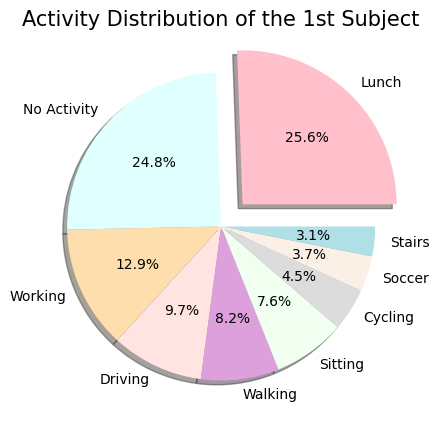

In [13]:
myexplode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0]
plot = rename_activity_s1.plot.pie(figsize=(8, 5), shadow=True, autopct='%1.1f%%', fontsize=10, explode = myexplode, colors=['pink', 'lightcyan', 'navajowhite', 'mistyrose', 'plum', 'honeydew', 'gainsboro', 'linen', 'powderblue'])
plt.ylabel('')
plt.title('Activity Distribution of the 1st Subject', fontsize=15)
plt.show()

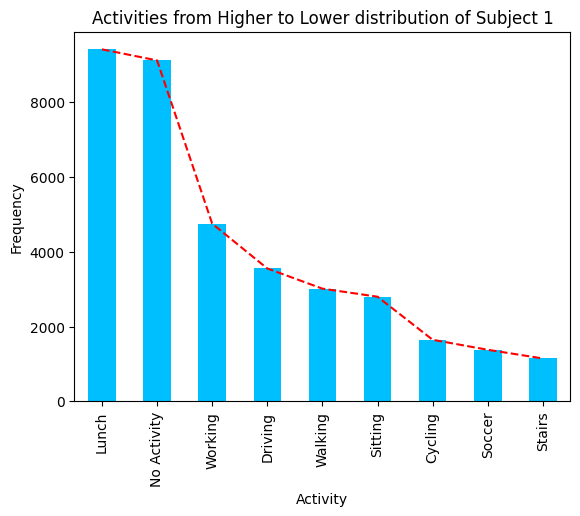

In [14]:
sorted_activity_s1 = rename_activity_s1.sort_values(ascending=False)
ax = sorted_activity_s1.plot(kind='bar', color='deepskyblue')
ax.set_title('Activities from Higher to Lower distribution of Subject 1')
ax.set_xlabel('Activity')
ax.set_ylabel('Frequency')
x = np.arange(len(sorted_activity_s1))
y = sorted_activity_s1.values
ax.plot(x, y, 'r--')
plt.show()

The Shape of the Label column is (4603, 1)
The first 10 rows of the Lable column are:
       Label
0  49.611369
1  50.323992
2  52.708336
3  55.640794
4  57.658406
5  58.911550
6  57.976459
7  58.676292
8  62.350800
9  69.113975


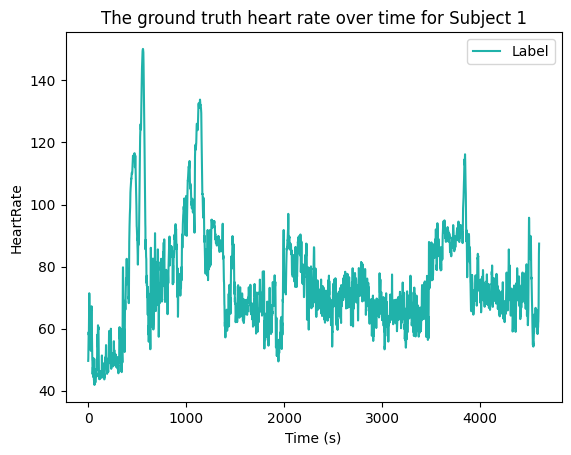

In [15]:
Labels_s1 = pd.DataFrame(data_s1["label"],columns=['labels'])
Labels_s1.columns = ["Label"]
print("The Shape of the Label column is", Labels_s1.shape)
print("The first 10 rows of the Lable column are:")
print(Labels_s1.head(10))
Labels_s1.plot(y='Label', use_index=True, title = 'The ground truth heart rate over time for Subject 1', color = 'lightseagreen')
plt.ylabel('HeartRate')
plt.xlabel('Time (s)')
plt.show()

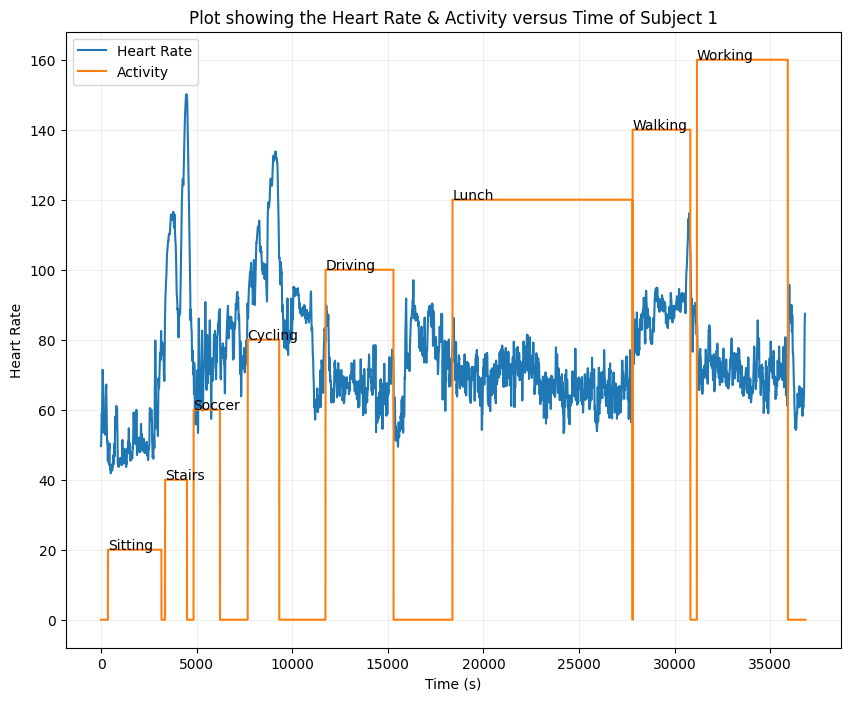

In [16]:
plot_activitynames_s1 = {0: "No Activity",1: "Sitting",2: "Stairs",3: "Soccer",4: "Cycling",5: "Driving",6: "Lunch",7: "Walking",8: "Working"}
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(Labels_s1.index * 8, Labels_s1['Label'], label='Heart Rate')
ax.plot(Activity_Sub1.index, Activity_Sub1['Activity'] * 20, label='Activity')
activities = None
for index, label_a in enumerate(Activity_Sub1['Activity']):
    if label_a != 0 and label_a != activities:
        name_act = plot_activitynames_s1[label_a]
        plt.text(Activity_Sub1.index[index], Activity_Sub1['Activity'].iloc[index] * 20, name_act, color='black', ha='left')
        activities = label_a
plt.ylabel('Heart Rate')
plt.xlabel('Time (s)')
plt.title("Plot showing the Heart Rate & Activity versus Time of Subject 1")
plt.legend()
ax.grid(True, linestyle='-', alpha=0.2)
plt.show()

In [17]:
size_activity_s1 = len(data_s1['activity'])
size_label_s1 = len(data_s1['label'])
print(f"Size of original activity data:  {size_activity_s1}\n")
print(f"Size of the data label: {size_label_s1}\n")
print(f"Multiplying : {size_label_s1*8}\n") #In the data it is about 8s window. The averaged heartbeats every 8 seconds, hence multiplied with 8 to get every 1 sec value
print(f"Number of values divided by the frequency: {size_activity_s1/4}\n") #as frequency is 4Hz i.e 4 cycles per sec. Hence converting to each second by dividing by 4
print(f"Difference is:{size_activity_s1 - size_label_s1*8}")

Size of original activity data:  36848

Size of the data label: 4603

Multiplying : 36824

Number of values divided by the frequency: 9212.0

Difference is:24


In [18]:
warnings.filterwarnings("ignore")
Labels_1_s1 = pd.DataFrame(np.repeat(Labels_s1.values,8,axis=0))
Labels_1_s1.columns = ["Label"]
if(np.size(Labels_1_s1, axis = 0) < np.size(Activity_Sub1, axis = 0)):
    mean = Labels_1_s1.mean()
    while(np.size(Labels_1_s1, axis = 0) < np.size(Activity_Sub1, axis = 0)):
        Labels_1_s1 = Labels_1_s1.append(mean, ignore_index=True)
Labels_1_s1

,Label
0,49.611369
1,49.611369
2,49.611369
3,49.611369
4,49.611369
...,...
36843,74.838901
36844,74.838901
36845,74.838901
36846,74.838901


In [19]:
print(f"In the Signal column of S1, we have the data with {len(data_s1['signal'].keys())} types: {list(data_s1['signal'].keys())})")
print(f"""
Within the chest type: {list(data_s1 ['signal'].get('chest').keys())} are the subtypes \n
Within the wrist type: {list(data_s1 ['signal'].get('wrist').keys())}are the subtypes
""")

In the Signal column of S1, we have the data with 2 types: ['chest', 'wrist'])

Within the chest type: ['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'] are the subtypes 

Within the wrist type: ['ACC', 'BVP', 'EDA', 'TEMP']are the subtypes



In [20]:
Signal_s1 = pd.DataFrame(data_s1 ["signal"])
Signal_s1

,chest,wrist
ACC,"[[0.8564000129699707, -0.06779998540878296, -0...","[[-0.765625, -0.078125, 0.671875], [-0.765625,..."
ECG,"[[0.015609741210937498], [0.01812744140625], [...",NaN
EMG,"[[-1.5], [-1.5], [-1.5], [-1.5], [-1.5], [-1.5...",NaN
EDA,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[4.722437], [4.728843], [4.718594], [4.717312..."
Temp,"[[-273.15], [-273.15], [-273.15], [-273.15], [...",NaN
Resp,"[[4.44183349609375], [4.45098876953125], [4.47...",NaN
BVP,NaN,"[[7.28], [6.33], [5.46], [4.6], [3.74], [2.86]..."
TEMP,NaN,"[[32.13], [32.16], [32.16], [32.16], [32.16], ..."


Considering the Chest signals of S1

In [21]:
ACC_s1 = pd.DataFrame(Signal_s1["chest"].ACC)
ACC_s1

,0,1,2
0,0.8564,-0.0678,-0.3656
1,0.8556,-0.0690,-0.3646
2,0.8520,-0.0702,-0.3642
3,0.8526,-0.0690,-0.3640
4,0.8526,-0.0698,-0.3654
...,...,...,...
6448395,0.8862,-0.1022,-0.2760
6448396,0.8866,-0.1036,-0.2766
6448397,0.8876,-0.1038,-0.2792
6448398,0.8862,-0.1016,-0.2782


In [22]:
ACC_s1 = ACC_s1.iloc[::175, :]
ACC_s1.columns = ["Acc-x","Acc-y","Acc-z"]
ACC_s1.reset_index(drop = True, inplace=True)
ACC_s1

,Acc-x,Acc-y,Acc-z
0,0.8564,-0.0678,-0.3656
1,0.8514,-0.0654,-0.3688
2,0.8514,-0.0662,-0.3708
3,0.8594,-0.0632,-0.3640
4,0.8510,-0.0674,-0.3694
...,...,...,...
36843,0.8956,-0.1158,-0.2526
36844,0.8888,-0.1062,-0.2684
36845,0.8802,-0.0966,-0.2938
36846,0.8842,-0.0962,-0.2820


In [23]:
ECG_s1 = pd.DataFrame(Signal_s1["chest"].ECG)
ECG_s1 = ECG_s1.iloc[::175, :]
ECG_s1.reset_index(drop = True, inplace=True)
ECG_s1

,0
0,0.015610
1,-0.015747
2,-0.008743
3,-0.339523
4,-0.089905
...,...
36843,-0.091507
36844,-0.159714
36845,0.074890
36846,-0.110779


In [24]:
Resp_s1 = pd.DataFrame(Signal_s1["chest"].Resp)
Resp_s1 = Resp_s1.iloc[::175, :]
Resp_s1.columns = ["Resp"]
Resp_s1.reset_index(drop = True, inplace=True)
Resp_s1

,Resp
0,4.441833
1,4.876709
2,3.340149
3,0.740051
4,-1.475525
...,...
36843,-2.183533
36844,-1.872253
36845,-2.696228
36846,-3.175354


In [25]:
chest_s1 = pd.concat([ACC_s1], sort=False)
chest_s1["Resp"] = Resp_s1
chest_s1["ECG"] = ECG_s1
chest_s1.reset_index(drop=True, inplace=True)
chest_s1 = chest_s1.add_prefix('chest-')
chest_s1

,chest-Acc-x,chest-Acc-y,chest-Acc-z,chest-Resp,chest-ECG
0,0.8564,-0.0678,-0.3656,4.441833,0.015610
1,0.8514,-0.0654,-0.3688,4.876709,-0.015747
2,0.8514,-0.0662,-0.3708,3.340149,-0.008743
3,0.8594,-0.0632,-0.3640,0.740051,-0.339523
4,0.8510,-0.0674,-0.3694,-1.475525,-0.089905
...,...,...,...,...,...
36843,0.8956,-0.1158,-0.2526,-2.183533,-0.091507
36844,0.8888,-0.1062,-0.2684,-1.872253,-0.159714
36845,0.8802,-0.0966,-0.2938,-2.696228,0.074890
36846,0.8842,-0.0962,-0.2820,-3.175354,-0.110779


Considering the Wrist signals of S1

In [26]:
ACC_s1 = pd.DataFrame(Signal_s1["wrist"].ACC)
ACC_s1 = ACC_s1.iloc[::8, :] #selecting rows at intervals of 8, as the windows are in 8-seconds interval
ACC_s1.columns = ["ACC_x", "ACC_y", "ACC_z"]
ACC_s1.reset_index(drop = True, inplace=True)
ACC_s1


,ACC_x,ACC_y,ACC_z
0,-0.765625,-0.078125,0.671875
1,-0.765625,-0.078125,0.671875
2,-0.765625,-0.078125,0.671875
3,-0.750000,-0.078125,0.671875
4,-0.765625,-0.078125,0.671875
...,...,...,...
36843,-0.375000,-0.015625,0.937500
36844,-0.359375,-0.015625,0.953125
36845,-0.437500,-0.015625,0.906250
36846,-0.390625,-0.015625,0.921875


In [27]:
EDA_s1 = pd.DataFrame(Signal_s1["wrist"].EDA)
EDA_s1.columns = ["EDA"]
EDA_s1

,EDA
0,4.722437
1,4.728843
2,4.718594
3,4.717312
4,4.713469
...,...
36843,3.199053
36844,3.186241
36845,3.170867
36846,3.159336


In [28]:
BVP_s1 = pd.DataFrame(Signal_s1["wrist"].BVP)
BVP_s1= BVP_s1.iloc[::16, :]
BVP_s1.columns = ["BVP"]
BVP_s1.reset_index(drop = True, inplace=True)
BVP_s1

,BVP
0,7.28
1,-11.36
2,-51.27
3,5.65
4,34.34
...,...
36843,22.62
36844,116.83
36845,-18.36
36846,-6.64


In [29]:
TEMP_s1 = pd.DataFrame(Signal_s1["wrist"].TEMP)
TEMP_s1.columns = ["TEMP"]
TEMP_s1

,TEMP
0,32.13
1,32.16
2,32.16
3,32.16
4,32.16
...,...
36843,34.37
36844,34.37
36845,34.37
36846,34.37


In [30]:
wrist_s1 = pd.concat([ACC_s1], axis = 1)
wrist_s1["BVP"] = BVP_s1
wrist_s1["TEMP"] = TEMP_s1
wrist_s1["EDA"] = EDA_s1
wrist_s1.reset_index(drop = True, inplace=True)
wrist_s1 = wrist_s1.add_prefix('wrist_')
wrist_s1

,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_BVP,wrist_TEMP,wrist_EDA
0,-0.765625,-0.078125,0.671875,7.28,32.13,4.722437
1,-0.765625,-0.078125,0.671875,-11.36,32.16,4.728843
2,-0.765625,-0.078125,0.671875,-51.27,32.16,4.718594
3,-0.750000,-0.078125,0.671875,5.65,32.16,4.717312
4,-0.765625,-0.078125,0.671875,34.34,32.16,4.713469
...,...,...,...,...,...,...
36843,-0.375000,-0.015625,0.937500,22.62,34.37,3.199053
36844,-0.359375,-0.015625,0.953125,116.83,34.37,3.186241
36845,-0.437500,-0.015625,0.906250,-18.36,34.37,3.170867
36846,-0.390625,-0.015625,0.921875,-6.64,34.37,3.159336


Combining the signals CHEST & WRIST

In [31]:
Signal_s1 = chest_s1.join(wrist_s1)
Signal_s1

,chest-Acc-x,chest-Acc-y,chest-Acc-z,chest-Resp,chest-ECG,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_BVP,wrist_TEMP,wrist_EDA
0,0.8564,-0.0678,-0.3656,4.441833,0.015610,-0.765625,-0.078125,0.671875,7.28,32.13,4.722437
1,0.8514,-0.0654,-0.3688,4.876709,-0.015747,-0.765625,-0.078125,0.671875,-11.36,32.16,4.728843
2,0.8514,-0.0662,-0.3708,3.340149,-0.008743,-0.765625,-0.078125,0.671875,-51.27,32.16,4.718594
3,0.8594,-0.0632,-0.3640,0.740051,-0.339523,-0.750000,-0.078125,0.671875,5.65,32.16,4.717312
4,0.8510,-0.0674,-0.3694,-1.475525,-0.089905,-0.765625,-0.078125,0.671875,34.34,32.16,4.713469
...,...,...,...,...,...,...,...,...,...,...,...
36843,0.8956,-0.1158,-0.2526,-2.183533,-0.091507,-0.375000,-0.015625,0.937500,22.62,34.37,3.199053
36844,0.8888,-0.1062,-0.2684,-1.872253,-0.159714,-0.359375,-0.015625,0.953125,116.83,34.37,3.186241
36845,0.8802,-0.0966,-0.2938,-2.696228,0.074890,-0.437500,-0.015625,0.906250,-18.36,34.37,3.170867
36846,0.8842,-0.0962,-0.2820,-3.175354,-0.110779,-0.390625,-0.015625,0.921875,-6.64,34.37,3.159336


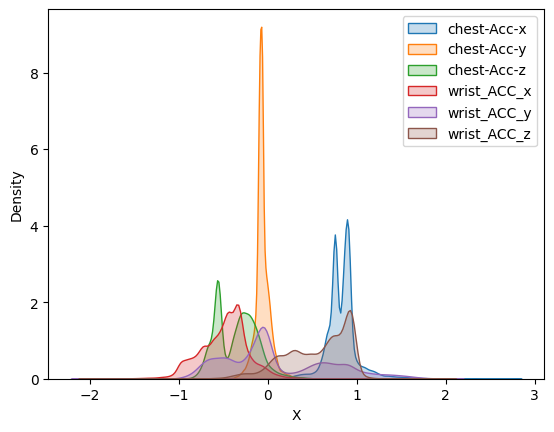

In [32]:
sns.kdeplot(Signal_s1['chest-Acc-x'], label='chest-Acc-x', shade=True)
sns.kdeplot(Signal_s1['chest-Acc-y'], label='chest-Acc-y', shade=True)
sns.kdeplot(Signal_s1['chest-Acc-z'], label='chest-Acc-z', shade=True)
sns.kdeplot(Signal_s1['wrist_ACC_x'], label='wrist_ACC_x', shade=True)
sns.kdeplot(Signal_s1['wrist_ACC_y'], label='wrist_ACC_y', shade=True)
sns.kdeplot(Signal_s1['wrist_ACC_z'], label='wrist_ACC_z', shade=True)
plt.xlabel('X')
plt.legend()
plt.show()

*Analysing* RPeaks

In [33]:
rpeaks_s1 = data_s1['rpeaks']
rpeaks_s1

array([    240,    1174,    2128, ..., 6447292, 6447748, 6448224],
      dtype=int32)

In [34]:
counted_rpeaks_s1 = []
index_s1 = 0 # index of rpeak element
time_s1 = 175 # time portion
count_s1 = 0 # number of rpeaks

while(index_s1 < len(rpeaks_s1)):
    rpeak_s1 = rpeaks_s1[index_s1]

    if(rpeak_s1 > time_s1): # Rpeak appears after the time portion
        counted_rpeaks_s1.append(count_s1)
        count_s1 = 0
        time_s1 += 175

    else:
        count_s1 += 1
        index_s1 += 1

# The rpeaks will probably end before the time portion, so we need to fill the last portions with 0
if(len(counted_rpeaks_s1) < 36848):
    while(len(counted_rpeaks_s1) < 36848):
        counted_rpeaks_s1.append(0)

In [35]:
Rpeaks_s1 = pd.DataFrame(counted_rpeaks_s1)
Rpeaks_s1.columns = ["Rpeaks"]
Rpeaks_s1

,Rpeaks
0,0
1,1
2,0
3,0
4,0
...,...
36843,0
36844,1
36845,0
36846,0


In [36]:
Signal_s1 = Signal_s1.join(Rpeaks_s1)
Signal_s1

,chest-Acc-x,chest-Acc-y,chest-Acc-z,chest-Resp,chest-ECG,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_BVP,wrist_TEMP,wrist_EDA,Rpeaks
0,0.8564,-0.0678,-0.3656,4.441833,0.015610,-0.765625,-0.078125,0.671875,7.28,32.13,4.722437,0
1,0.8514,-0.0654,-0.3688,4.876709,-0.015747,-0.765625,-0.078125,0.671875,-11.36,32.16,4.728843,1
2,0.8514,-0.0662,-0.3708,3.340149,-0.008743,-0.765625,-0.078125,0.671875,-51.27,32.16,4.718594,0
3,0.8594,-0.0632,-0.3640,0.740051,-0.339523,-0.750000,-0.078125,0.671875,5.65,32.16,4.717312,0
4,0.8510,-0.0674,-0.3694,-1.475525,-0.089905,-0.765625,-0.078125,0.671875,34.34,32.16,4.713469,0
...,...,...,...,...,...,...,...,...,...,...,...,...
36843,0.8956,-0.1158,-0.2526,-2.183533,-0.091507,-0.375000,-0.015625,0.937500,22.62,34.37,3.199053,0
36844,0.8888,-0.1062,-0.2684,-1.872253,-0.159714,-0.359375,-0.015625,0.953125,116.83,34.37,3.186241,1
36845,0.8802,-0.0966,-0.2938,-2.696228,0.074890,-0.437500,-0.015625,0.906250,-18.36,34.37,3.170867,0
36846,0.8842,-0.0962,-0.2820,-3.175354,-0.110779,-0.390625,-0.015625,0.921875,-6.64,34.37,3.159336,0


Combining the above data with the Activity column

In [37]:
activity_label_df = pd.concat([Activity_Sub1, Labels_1_s1], axis=1)
Signal_s1 = pd.concat([Signal_s1, activity_label_df], axis=1)
Signal_s1['Subject'] = data_s1['subject']


In [38]:
act_activity_s1 = {0: "No Activity", 1: "Sitting", 2: "Stairs", 3: "Soccer", 4: "Cycling", 5: "Driving", 6: "Lunch", 7: "Walking", 8: "Working"}

Text(0, 0.5, 'Temperature')

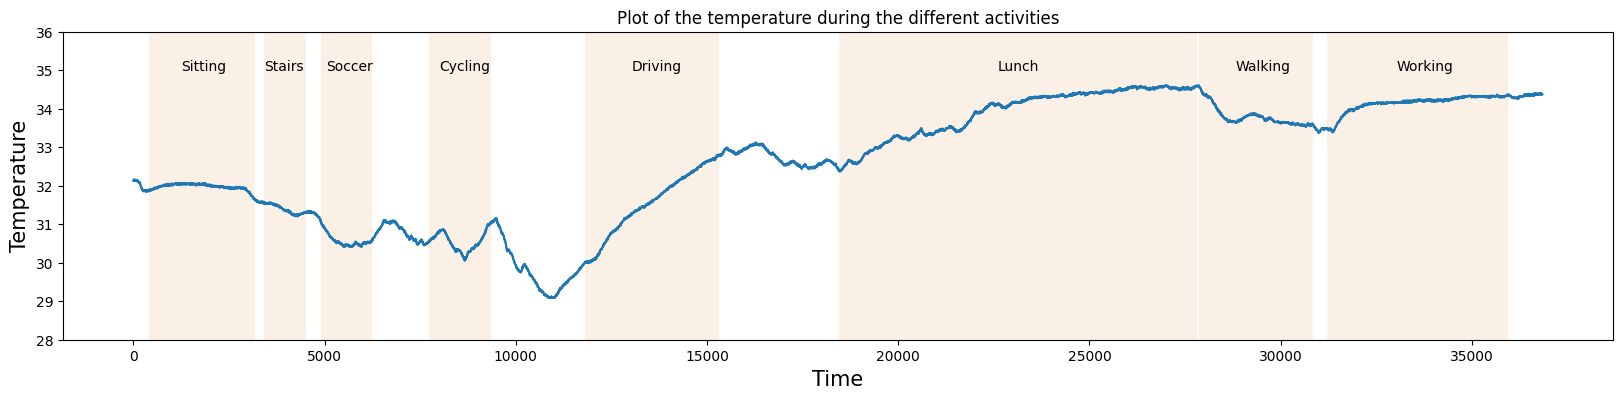

In [39]:
fig, ax = plt.subplots(figsize=(20, 4))
style = dict(size=10, color='k')

x = 0
ini = 0
fin = 0
while(x < len(Signal_s1.loc[:, 'Activity'])):
    i_index = Signal_s1.loc[x, 'Activity']

    if(i_index != 0):

        ini = x
        while(x < len(Signal_s1.loc[:, 'Activity'])):
            if(Signal_s1.loc[x, 'Activity'] != i_index):
                break

            else:
                x += 1

        fin = x-1
        sport = act_activity_s1[i_index]
        plt.axvspan(xmin=ini + 60, xmax=fin, color='linen')
        ax.text((ini+fin)//2 - 500, 35, sport, **style)
        ax.set_title('Plot of the temperature during the different activities')
        ini = 0
        fin = 0

    else :
        x += 1

ax.set_ylim(top = 36, bottom = 28)
Signal_s1.loc[:, 'wrist_TEMP'].plot(ax=ax)
plt.xlabel("Time", fontsize=15)
plt.ylabel("Temperature", fontsize=15)

Text(0, 0.5, 'Heartrate')

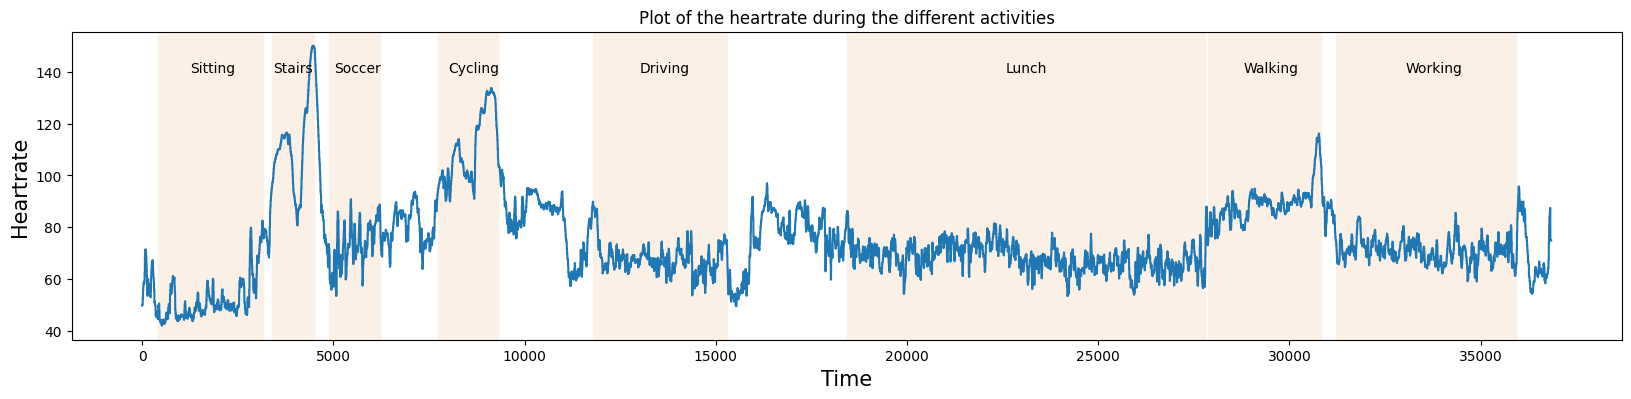

In [40]:
fig, ax = plt.subplots(figsize=(20, 4))
style = dict(size=10, color='k')

x = 0
ini = 0
fin = 0
while(x < len(Signal_s1.loc[:, 'Activity'])):
    i_index = Signal_s1.loc[x, 'Activity']

    if(i_index != 0):

        ini = x
        while(x < len(Signal_s1.loc[:, 'Activity'])):
            if(Signal_s1.loc[x, 'Activity'] != i_index):
                break

            else:
                x += 1

        fin = x-1
        sport = act_activity_s1[i_index]
        plt.axvspan(xmin=ini + 60, xmax=fin, color='linen')
        ax.text((ini+fin)//2 - 500, 140, sport, **style)
        ax.set_title('Plot of the heartrate during the different activities')
        ini = 0
        fin = 0

    else :
        x += 1

#ax.set_ylim(top = 36, bottom = 28)
Signal_s1.loc[:,'Label'].plot(ax=ax)
plt.xlabel("Time", fontsize=15)
plt.ylabel("Heartrate", fontsize=15)


FEATURE EXTRACTION

In [41]:
Signal_s1

,chest-Acc-x,chest-Acc-y,chest-Acc-z,chest-Resp,chest-ECG,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_BVP,wrist_TEMP,wrist_EDA,Rpeaks,Activity,Label,Subject
0,0.8564,-0.0678,-0.3656,4.441833,0.015610,-0.765625,-0.078125,0.671875,7.28,32.13,4.722437,0,0,49.611369,S1
1,0.8514,-0.0654,-0.3688,4.876709,-0.015747,-0.765625,-0.078125,0.671875,-11.36,32.16,4.728843,1,0,49.611369,S1
2,0.8514,-0.0662,-0.3708,3.340149,-0.008743,-0.765625,-0.078125,0.671875,-51.27,32.16,4.718594,0,0,49.611369,S1
3,0.8594,-0.0632,-0.3640,0.740051,-0.339523,-0.750000,-0.078125,0.671875,5.65,32.16,4.717312,0,0,49.611369,S1
4,0.8510,-0.0674,-0.3694,-1.475525,-0.089905,-0.765625,-0.078125,0.671875,34.34,32.16,4.713469,0,0,49.611369,S1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36843,0.8956,-0.1158,-0.2526,-2.183533,-0.091507,-0.375000,-0.015625,0.937500,22.62,34.37,3.199053,0,0,74.838901,S1
36844,0.8888,-0.1062,-0.2684,-1.872253,-0.159714,-0.359375,-0.015625,0.953125,116.83,34.37,3.186241,1,0,74.838901,S1
36845,0.8802,-0.0966,-0.2938,-2.696228,0.074890,-0.437500,-0.015625,0.906250,-18.36,34.37,3.170867,0,0,74.838901,S1
36846,0.8842,-0.0962,-0.2820,-3.175354,-0.110779,-0.390625,-0.015625,0.921875,-6.64,34.37,3.159336,0,0,74.838901,S1


In [42]:
remove_s1 = ["Subject", "WEIGHT", "Gender", "AGE", "HEIGHT", "SKIN", "SPORT", "Activity"]
DF_FE = [column for column in Signal_s1.columns if column not in remove_s1]
PPG_DF = Signal_s1[DF_FE].copy()
DF_FE

['chest-Acc-x',
 'chest-Acc-y',
 'chest-Acc-z',
 'chest-Resp',
 'chest-ECG',
 'wrist_ACC_x',
 'wrist_ACC_y',
 'wrist_ACC_z',
 'wrist_BVP',
 'wrist_TEMP',
 'wrist_EDA',
 'Rpeaks',
 'Label']

In [43]:
PPG_DF

,chest-Acc-x,chest-Acc-y,chest-Acc-z,chest-Resp,chest-ECG,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_BVP,wrist_TEMP,wrist_EDA,Rpeaks,Label
0,0.8564,-0.0678,-0.3656,4.441833,0.015610,-0.765625,-0.078125,0.671875,7.28,32.13,4.722437,0,49.611369
1,0.8514,-0.0654,-0.3688,4.876709,-0.015747,-0.765625,-0.078125,0.671875,-11.36,32.16,4.728843,1,49.611369
2,0.8514,-0.0662,-0.3708,3.340149,-0.008743,-0.765625,-0.078125,0.671875,-51.27,32.16,4.718594,0,49.611369
3,0.8594,-0.0632,-0.3640,0.740051,-0.339523,-0.750000,-0.078125,0.671875,5.65,32.16,4.717312,0,49.611369
4,0.8510,-0.0674,-0.3694,-1.475525,-0.089905,-0.765625,-0.078125,0.671875,34.34,32.16,4.713469,0,49.611369
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36843,0.8956,-0.1158,-0.2526,-2.183533,-0.091507,-0.375000,-0.015625,0.937500,22.62,34.37,3.199053,0,74.838901
36844,0.8888,-0.1062,-0.2684,-1.872253,-0.159714,-0.359375,-0.015625,0.953125,116.83,34.37,3.186241,1,74.838901
36845,0.8802,-0.0966,-0.2938,-2.696228,0.074890,-0.437500,-0.015625,0.906250,-18.36,34.37,3.170867,0,74.838901
36846,0.8842,-0.0962,-0.2820,-3.175354,-0.110779,-0.390625,-0.015625,0.921875,-6.64,34.37,3.159336,0,74.838901


Correlation Matrix of subject S1

In [44]:
corrs1 = round(PPG_DF.corr(),2)
corrs1.head()

,chest-Acc-x,chest-Acc-y,chest-Acc-z,chest-Resp,chest-ECG,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_BVP,wrist_TEMP,wrist_EDA,Rpeaks,Label
chest-Acc-x,1.00,-0.14,0.31,-0.02,0.07,0.00,0.18,-0.21,0.01,0.04,-0.04,0.04,0.21
chest-Acc-y,-0.14,1.00,-0.12,0.01,0.03,-0.08,-0.04,0.01,-0.03,-0.14,0.15,-0.00,-0.02
chest-Acc-z,0.31,-0.12,1.00,0.00,-0.02,-0.11,0.32,-0.42,0.01,-0.03,0.04,0.06,0.43
chest-Resp,-0.02,0.01,0.00,1.00,-0.01,0.00,0.01,0.00,-0.00,0.01,-0.01,0.01,0.01
chest-ECG,0.07,0.03,-0.02,-0.01,1.00,-0.00,0.01,0.00,-0.00,0.01,-0.01,0.09,0.00


<Axes: >

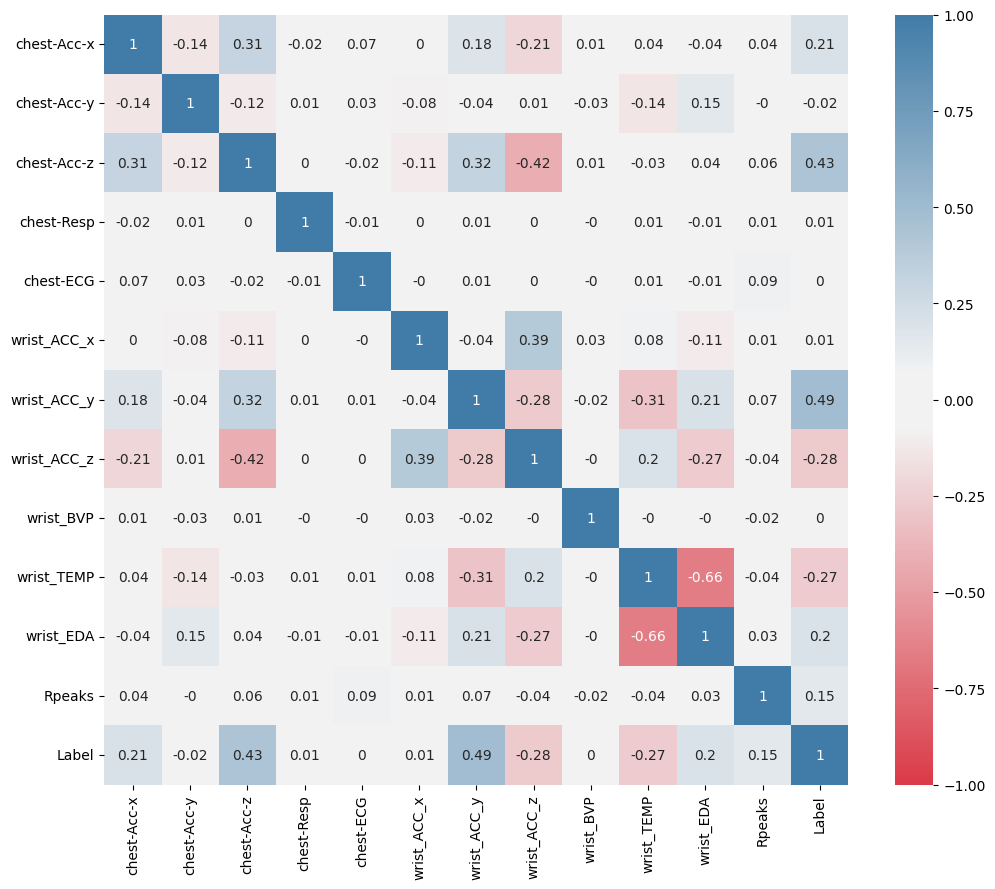

In [45]:
cols = corrs1.columns[: int(len(corrs1.columns))]
cmap = sns.diverging_palette(10, 240, sep=20, as_cmap=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corrs1, annot=True, vmin=-1.0, vmax=1.0, cmap=cmap)

#train - test split of s1

In [46]:
X_s1 = PPG_DF.values
Y_s1 = Signal_s1['Activity']

In [47]:
X_train_s1, X_test_s1, Y_train_s1, Y_test_s1 = train_test_split(X_s1, Y_s1, test_size=0.25, random_state = 42, stratify = Y_s1)

#Model fitting

Decision Tree

In [48]:
tree_s1 = DecisionTreeClassifier(random_state=42)
tree_s1.fit(X_train_s1, Y_train_s1)
Y_pred_tree_s1 = tree_s1.predict(X_test_s1)
print("Classification Report is shown below:\n")
print(classification_report(Y_test_s1, Y_pred_tree_s1))
DT_A = accuracy_score(Y_test_s1, Y_pred_tree_s1)
DT_P = precision_score(Y_test_s1,Y_pred_tree_s1,average='weighted')
DT_R = recall_score(Y_test_s1, Y_pred_tree_s1, average='weighted')
DT_F = f1_score(Y_test_s1, Y_pred_tree_s1, average='weighted')
print("The accuracy score of decision tree is:", DT_A)
print("The precision score of decision tree is:", DT_P)
print("The recall score of decision tree is:", DT_R)
print("The F1 score of decision tree is:", DT_F)

Classification Report is shown below:

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2281
           1       1.00      1.00      1.00       700
           2       0.99      1.00      0.99       287
           3       0.99      0.99      0.99       345
           4       0.98      0.98      0.98       412
           5       0.99      0.99      0.99       889
           6       0.99      0.99      0.99      2355
           7       0.98      0.98      0.98       754
           8       0.99      0.99      0.99      1189

    accuracy                           0.99      9212
   macro avg       0.99      0.99      0.99      9212
weighted avg       0.99      0.99      0.99      9212

The accuracy score of decision tree is: 0.9864307425097699
The precision score of decision tree is: 0.9864295944952598
The recall score of decision tree is: 0.9864307425097699
The F1 score of decision tree is: 0.9864205775458061


In [49]:
DTcm_s1 = confusion_matrix(Y_test_s1, Y_pred_tree_s1)
DTcm_s1

array([[2223,    2,    3,    4,    9,    3,   19,   12,    6],
       [   1,  698,    0,    0,    0,    1,    0,    0,    0],
       [   1,    0,  286,    0,    0,    0,    0,    0,    0],
       [   3,    0,    0,  341,    0,    1,    0,    0,    0],
       [   9,    1,    0,    0,  402,    0,    0,    0,    0],
       [   3,    0,    0,    0,    0,  882,    4,    0,    0],
       [   7,    0,    0,    0,    0,    0, 2335,    5,    8],
       [   7,    0,    0,    0,    0,    0,    5,  742,    0],
       [   5,    0,    0,    0,    0,    0,    6,    0, 1178]])

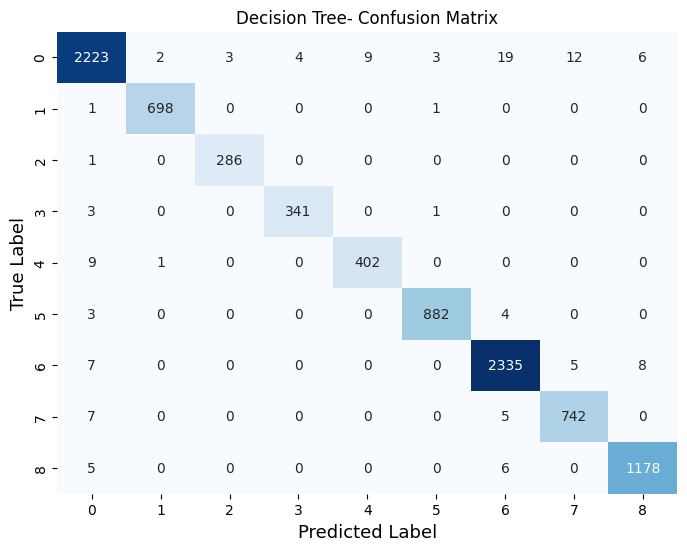

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(DTcm_s1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('True Label',fontsize=13)
plt.xlabel('Predicted Label',fontsize=13)
plt.title('Decision Tree- Confusion Matrix')
plt.show()


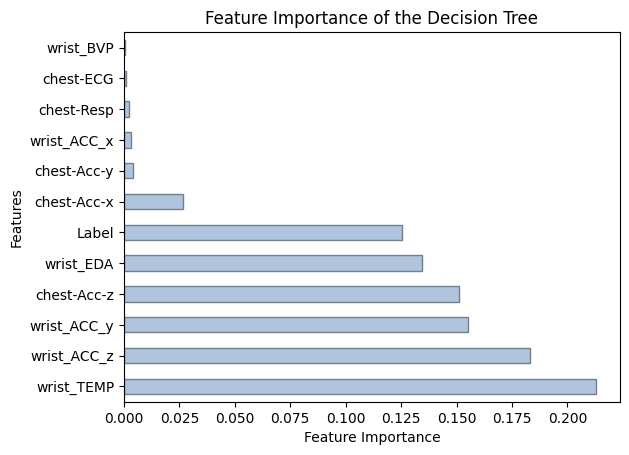

In [51]:
feature_importances_s1 = pd.Series(tree_s1.feature_importances_, index=DF_FE)
feature_importances_s1.nlargest(12).plot(kind='barh', color = 'lightsteelblue', edgecolor = 'slategrey')
plt.title('Feature Importance of the Decision Tree')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

SVM

In [52]:
SVM_clf_s1 = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train_s1, Y_train_s1)
Y_pred_svm_s1 = SVM_clf_s1.predict(X_test_s1)
print("Classification Report is shown below:\n")
print(classification_report(Y_test_s1, Y_pred_svm_s1))
SVM_A = accuracy_score(Y_test_s1, Y_pred_svm_s1)
SVM_P = precision_score(Y_test_s1,Y_pred_svm_s1,average='weighted')
SVM_R = recall_score(Y_test_s1, Y_pred_svm_s1, average='weighted')
SVM_F = f1_score(Y_test_s1,Y_pred_svm_s1, average='weighted')
print("The accuracy score of SVM is:", SVM_A)
print("The precision score of SVM is:", SVM_P)
print("The recall score of SVM is:",SVM_R)
print("The F1 score of SVM is:", SVM_F)

Classification Report is shown below:

              precision    recall  f1-score   support

           0       0.68      0.73      0.70      2281
           1       0.91      0.82      0.86       700
           2       0.65      0.72      0.68       287
           3       0.97      0.74      0.84       345
           4       0.86      0.86      0.86       412
           5       0.94      0.80      0.87       889
           6       0.91      0.92      0.92      2355
           7       0.69      0.65      0.67       754
           8       0.87      0.93      0.90      1189

    accuracy                           0.82      9212
   macro avg       0.83      0.80      0.81      9212
weighted avg       0.82      0.82      0.82      9212

The accuracy score of SVM is: 0.8177377333912288
The precision score of SVM is: 0.8235576738976894
The recall score of SVM is: 0.8177377333912288
The F1 score of SVM is: 0.8188821378957286


In [53]:
cm_svm_s1 = confusion_matrix(Y_test_s1, Y_pred_svm_s1)
print(cm_svm_s1)

[[1667   35   74    9   39   40  117  181  119]
 [  78  575    0    0    0    3   10   16   18]
 [  73    0  208    0    3    0    0    3    0]
 [  86    0    0  255    0    4    0    0    0]
 [  28    0   22    0  356    0    0    6    0]
 [ 154    0    0    0    0  715   13    0    7]
 [ 166    1    0    0    0    0 2163    1   24]
 [ 192    1   16    0   16    0   39  489    1]
 [  24   22    1    0    0    0   29    8 1105]]


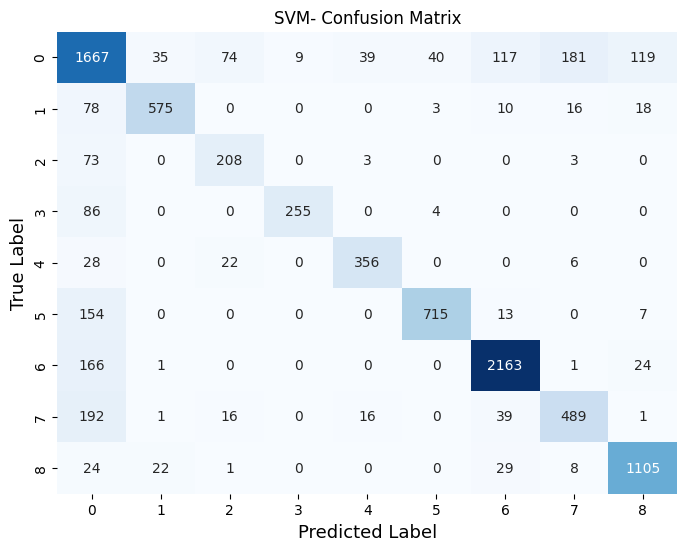

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_s1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('True Label',fontsize=13)
plt.xlabel('Predicted Label',fontsize=13)
plt.title('SVM- Confusion Matrix')
plt.show()

XGBOOST

In [55]:
xgb_s1 = XGBClassifier(objective='reg:linear', eta=0.3, colsample_bytree=0.3, learning_rate=0.1, max_depth=10, alpha=10, n_estimators=100, subsample=0.7);
xgb_s1.fit(X_train_s1, Y_train_s1)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [56]:
from sklearn.metrics import classification_report
xgb_pred_s1 = xgb_s1.predict(X_test_s1)
Class_report_s1 = classification_report(Y_test_s1, xgb_pred_s1, target_names=["0", "1","2","3","4","5", "6","7","8"])
print(" summary report of classification:")
print(Class_report_s1)

 summary report of classification:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2281
           1       1.00      0.99      0.99       700
           2       0.99      0.96      0.98       287
           3       1.00      0.94      0.97       345
           4       0.99      0.97      0.98       412
           5       1.00      0.99      1.00       889
           6       0.99      0.99      0.99      2355
           7       0.97      0.97      0.97       754
           8       0.99      0.99      0.99      1189

    accuracy                           0.98      9212
   macro avg       0.99      0.98      0.98      9212
weighted avg       0.98      0.98      0.98      9212



In [57]:
cm_xg_s1= confusion_matrix(Y_test_s1, xgb_pred_s1)
cm_xg_s1

array([[2227,    3,    3,    0,    5,    1,   16,   19,    7],
       [   4,  696,    0,    0,    0,    0,    0,    0,    0],
       [  11,    0,  276,    0,    0,    0,    0,    0,    0],
       [  20,    0,    0,  325,    0,    0,    0,    0,    0],
       [  13,    0,    0,    0,  399,    0,    0,    0,    0],
       [   4,    0,    0,    0,    0,  883,    2,    0,    0],
       [  23,    0,    0,    0,    0,    0, 2331,    0,    1],
       [   9,    0,    0,    0,    1,    0,   11,  733,    0],
       [  11,    0,    0,    0,    0,    0,    2,    0, 1176]])

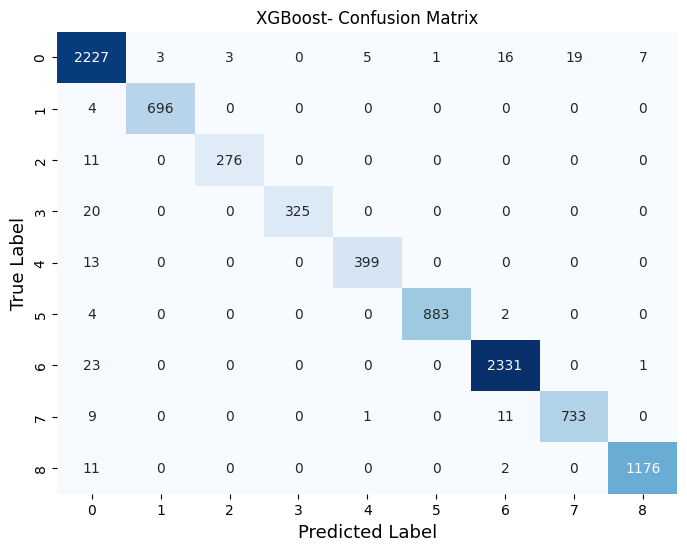

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xg_s1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('True Label',fontsize=13)
plt.xlabel('Predicted Label',fontsize=13)
plt.title('XGBoost- Confusion Matrix')
plt.show()

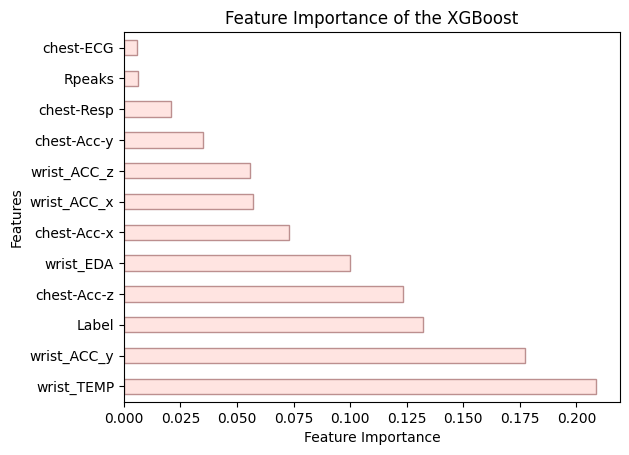

In [59]:
feature_XGB_importances_s1 = pd.Series(xgb_s1 .feature_importances_, index=DF_FE)
feature_XGB_importances_s1 .nlargest(12).plot(kind='barh', color ='mistyrose', edgecolor = 'rosybrown')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance of the XGBoost')
plt.show()


Random Forest

In [60]:
Randomforest_s1 = RandomForestClassifier(n_estimators = 65, random_state = 42)
Randomforest_s1.fit(X_train_s1, Y_train_s1)
RF_s1 = Randomforest_s1.predict(X_test_s1)
print("Classification Report is shown below:\n")
print(classification_report(Y_test_s1,RF_s1))
RF_A = accuracy_score(Y_test_s1, RF_s1)
RF_P = precision_score(Y_test_s1,RF_s1,average='weighted')
RF_R = recall_score(Y_test_s1, RF_s1, average='weighted')
RF_F = f1_score(Y_test_s1,RF_s1, average='weighted')
print("The accuracy score of decision tree is:", RF_A)
print("The precision score of decision tree is:", RF_P)
print("The recall score of decision tree is:", RF_R)
print("The F1 score of decision tree is:", RF_F)

Classification Report is shown below:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2281
           1       1.00      0.99      1.00       700
           2       1.00      0.98      0.99       287
           3       1.00      0.97      0.99       345
           4       1.00      0.98      0.99       412
           5       1.00      1.00      1.00       889
           6       0.99      0.99      0.99      2355
           7       0.98      0.99      0.99       754
           8       1.00      0.99      1.00      1189

    accuracy                           0.99      9212
   macro avg       0.99      0.99      0.99      9212
weighted avg       0.99      0.99      0.99      9212

The accuracy score of decision tree is: 0.9903386886669562
The precision score of decision tree is: 0.9904033724541931
The recall score of decision tree is: 0.9903386886669562
The F1 score of decision tree is: 0.9903476849289525


In [61]:
cm_rf_s1 = confusion_matrix(Y_test_s1, RF_s1)
cm_rf_s1

array([[2253,    0,    0,    0,    2,    0,   11,   14,    1],
       [   4,  695,    0,    0,    0,    1,    0,    0,    0],
       [   5,    0,  282,    0,    0,    0,    0,    0,    0],
       [   8,    0,    0,  335,    0,    2,    0,    0,    0],
       [   9,    0,    0,    0,  403,    0,    0,    0,    0],
       [   1,    0,    0,    0,    0,  886,    2,    0,    0],
       [  15,    0,    0,    0,    0,    0, 2340,    0,    0],
       [   0,    0,    0,    0,    0,    0,    6,  748,    0],
       [   7,    0,    0,    0,    0,    0,    1,    0, 1181]])

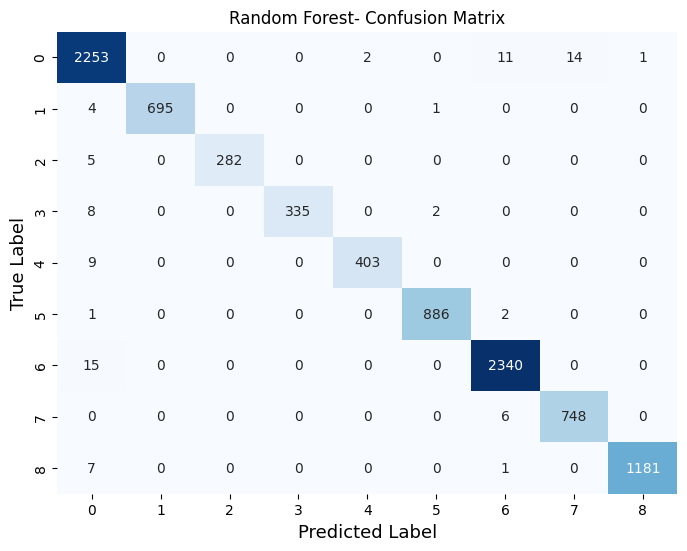

In [62]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_s1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('True Label',fontsize=13)
plt.xlabel('Predicted Label',fontsize=13)
plt.title('Random Forest- Confusion Matrix')
plt.show()

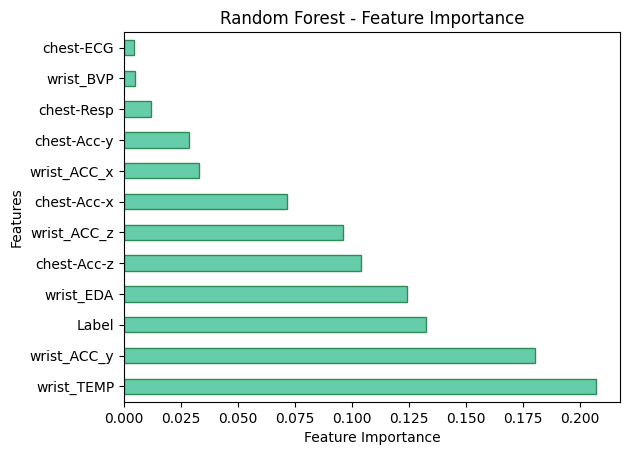

In [63]:
feature_RF_importances_s1 = pd.Series(Randomforest_s1.feature_importances_, index=DF_FE)
feature_RF_importances_s1 .nlargest(12).plot(kind='barh', color = 'mediumaquamarine', edgecolor = 'seagreen' )
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest - Feature Importance')
plt.show()


LOGISTIC REGRESSION - SOFTMAX

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
scaler = StandardScaler()
X_train_s1 = scaler.fit_transform(X_train_s1)
X_test_s1 = scaler.transform(X_test_s1)
model_smax_s1 = LogisticRegression(penalty='l2', C=1, multi_class='multinomial', solver='lbfgs')
model_smax_s1.fit(X_train_s1, Y_train_s1)
Y_predict_softmax_s1 = model_smax_s1.predict(X_test_s1)
print("Classification Report is shown below:\n")
print(classification_report(Y_test_s1, Y_predict_softmax_s1))
LR_A = accuracy_score(Y_test_s1, Y_predict_softmax_s1)
LR_P = precision_score(Y_test_s1, Y_predict_softmax_s1, average='weighted')
LR_R = recall_score(Y_test_s1, Y_predict_softmax_s1, average='weighted')
LR_F = f1_score(Y_test_s1, Y_predict_softmax_s1, average='weighted')
print("The accuracy score of softmax regression is:", LR_A)
print("The precision score of softmax regression is:", LR_P)
print("The recall score of softmax regression is:", LR_R)
print("The F1 score of softmax regression is:", LR_F)


Classification Report is shown below:

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      2281
           1       0.95      0.91      0.93       700
           2       0.90      0.72      0.80       287
           3       0.91      0.90      0.91       345
           4       0.90      0.90      0.90       412
           5       0.94      0.94      0.94       889
           6       0.93      0.97      0.95      2355
           7       0.85      0.91      0.88       754
           8       0.86      0.95      0.91      1189

    accuracy                           0.89      9212
   macro avg       0.90      0.89      0.89      9212
weighted avg       0.89      0.89      0.89      9212

The accuracy score of softmax regression is: 0.8925314806773773
The precision score of softmax regression is: 0.891792512535927
The recall score of softmax regression is: 0.8925314806773773
The F1 score of softmax regression is: 0.8910511713950963


In [67]:
cm_LR_s1 = confusion_matrix(Y_test_s1, Y_predict_softmax_s1)
cm_LR_s1

array([[1753,   35,   17,   31,   43,   46,  100,  109,  147],
       [  59,  639,    0,    0,    0,    0,    2,    0,    0],
       [  79,    0,  206,    0,    0,    0,    2,    0,    0],
       [  30,    0,    0,  312,    0,    3,    0,    0,    0],
       [  36,    0,    6,    0,  370,    0,    0,    0,    0],
       [  39,    0,    0,    0,    0,  838,    3,    0,    9],
       [  61,    0,    0,    0,    0,    1, 2284,    0,    9],
       [  22,    0,    0,    0,    0,    1,   28,  689,   14],
       [  24,    0,    0,    0,    0,    1,   24,    9, 1131]])

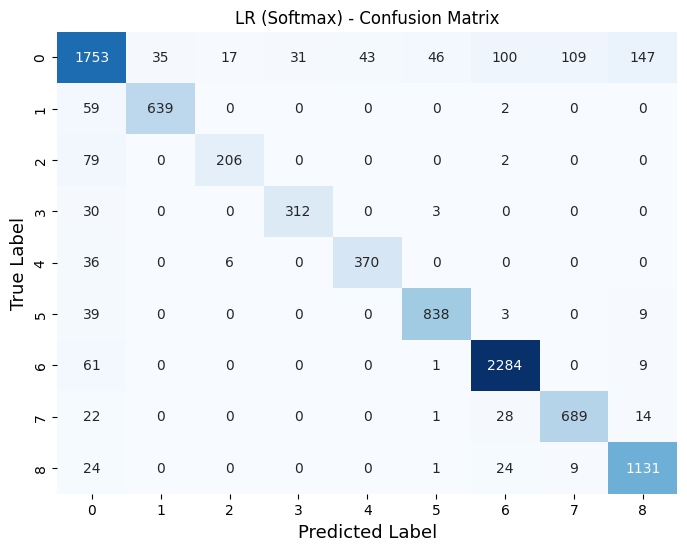

In [68]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_LR_s1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('True Label',fontsize=13)
plt.xlabel('Predicted Label',fontsize=13)
plt.title('LR (Softmax) - Confusion Matrix')
plt.show()

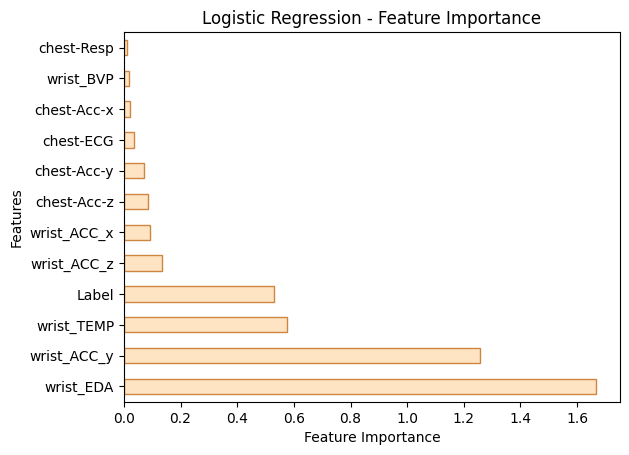

In [69]:
feature_LR_importances_s1 = pd.Series(abs(model_smax_s1.coef_[0]), index=DF_FE)
feature_LR_importances_s1.nlargest(12).plot(kind='barh', color = 'bisque', edgecolor = 'peru')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Logistic Regression - Feature Importance')
plt.show()

#COMPARING ALL THE CLASSIFICATION MODELS

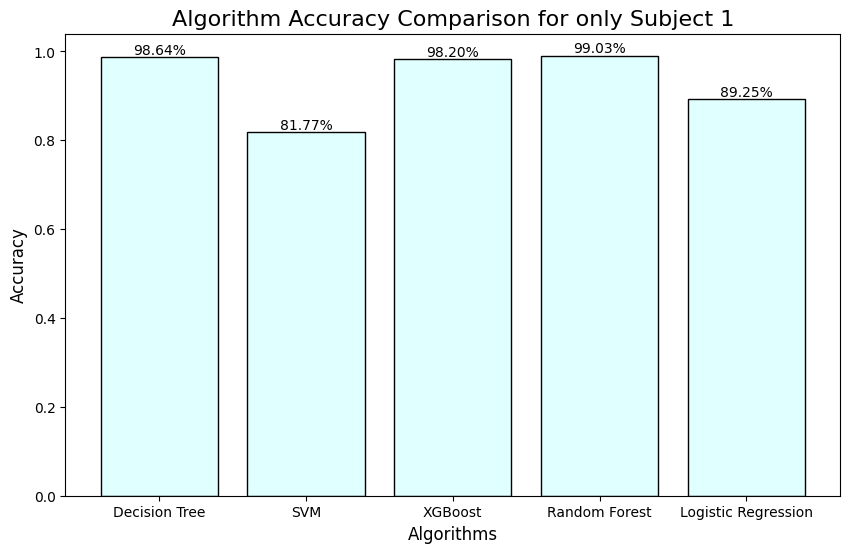

In [70]:
scores_algo_1 = [DT_A, SVM_A, accuracy_score(xgb_pred_s1, Y_test_s1), RF_A, LR_A]
algorithms = ['Decision Tree', 'SVM', 'XGBoost', 'Random Forest', 'Logistic Regression']

plt.figure(figsize=(10, 6))
algo_1 = plt.bar(algorithms, scores_algo_1, color='lightcyan', edgecolor='black')
for algos, score_algo_1 in zip(algo_1, scores_algo_1):
    height = algos.get_height()
    plt.text(algos.get_x() + algos.get_width() / 2, height, f'{score_algo_1 * 100:.2f}%', ha='center', va='bottom')
plt.xlabel('Algorithms', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Algorithm Accuracy Comparison for only Subject 1', fontsize=16)
plt.show()

##ARIMA Predictions for Subject 1

In [84]:
driving_data = Signal_s1[Signal_s1['Activity'] == 5]
driving_data

,chest-Acc-x,chest-Acc-y,chest-Acc-z,chest-Resp,chest-ECG,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_BVP,wrist_TEMP,wrist_EDA,Rpeaks,Activity,Label,Subject
11740,0.7530,-0.1010,-0.6182,3.904724,-0.273193,-0.156250,-0.578125,0.765625,-133.04,29.91,11.429107,1,5,79.361777,S1
11741,0.6898,-0.0448,-0.6306,2.264404,0.090820,-0.125000,-0.531250,0.843750,70.70,29.95,11.498291,0,5,79.361777,S1
11742,0.7090,-0.0292,-0.6064,-2.238464,-0.162643,0.140625,-0.437500,1.000000,-16.53,29.95,11.819121,0,5,79.361777,S1
11743,0.6994,-0.0318,-0.6146,-6.768799,0.092239,-0.156250,-0.781250,0.421875,-64.26,29.95,12.107387,1,5,79.361777,S1
11744,0.7054,-0.0476,-0.6262,-9.437561,0.426865,-0.312500,-0.531250,0.750000,156.78,29.95,12.492156,0,5,81.381234,S1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15291,0.6968,-0.0700,-0.6412,0.047302,-0.142822,-0.078125,-0.937500,0.312500,-10.60,32.77,7.352242,1,5,72.927477,S1
15292,0.6582,-0.0652,-0.6486,0.086975,-0.297409,-0.312500,-0.937500,0.234375,-236.54,32.77,7.256153,0,5,72.927477,S1
15293,0.6506,-0.0942,-0.6762,0.035095,-0.386536,-0.609375,-0.625000,0.421875,155.70,32.77,7.493171,0,5,72.927477,S1
15294,0.6904,-0.0018,-0.6482,0.035095,-0.082718,-1.031250,-0.437500,0.421875,168.28,32.77,7.910835,1,5,72.927477,S1


In [85]:
start_date_time = '2019-01-01 10:00:00'
num_seconds = len(driving_data)
timestamps = pd.date_range(start=start_date_time, periods=num_seconds, freq='0.25S') #as 4hz converting to 0.25s
driving_data['Timestamp'] = timestamps
extracted_data = driving_data[[ 'Timestamp', 'Label']]
Arima_test = pd.DataFrame(extracted_data)
Arima_test

,Timestamp,Label
11740,2019-01-01 10:00:00.000,79.361777
11741,2019-01-01 10:00:00.250,79.361777
11742,2019-01-01 10:00:00.500,79.361777
11743,2019-01-01 10:00:00.750,79.361777
11744,2019-01-01 10:00:01.000,81.381234
...,...,...
15291,2019-01-01 10:14:47.750,72.927477
15292,2019-01-01 10:14:48.000,72.927477
15293,2019-01-01 10:14:48.250,72.927477
15294,2019-01-01 10:14:48.500,72.927477


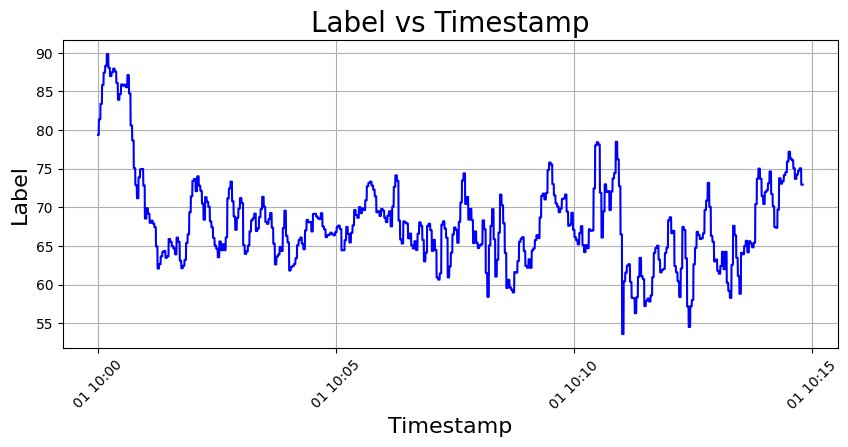

In [86]:
Arima_test['Timestamp'] = pd.to_datetime(Arima_test['Timestamp'])
plt.figure(figsize=(10, 4))
plt.plot(Arima_test['Timestamp'], Arima_test['Label'], color='blue')
plt.title('Label vs Timestamp', fontsize=20)
plt.xlabel('Timestamp', fontsize=16)
plt.ylabel('Label', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


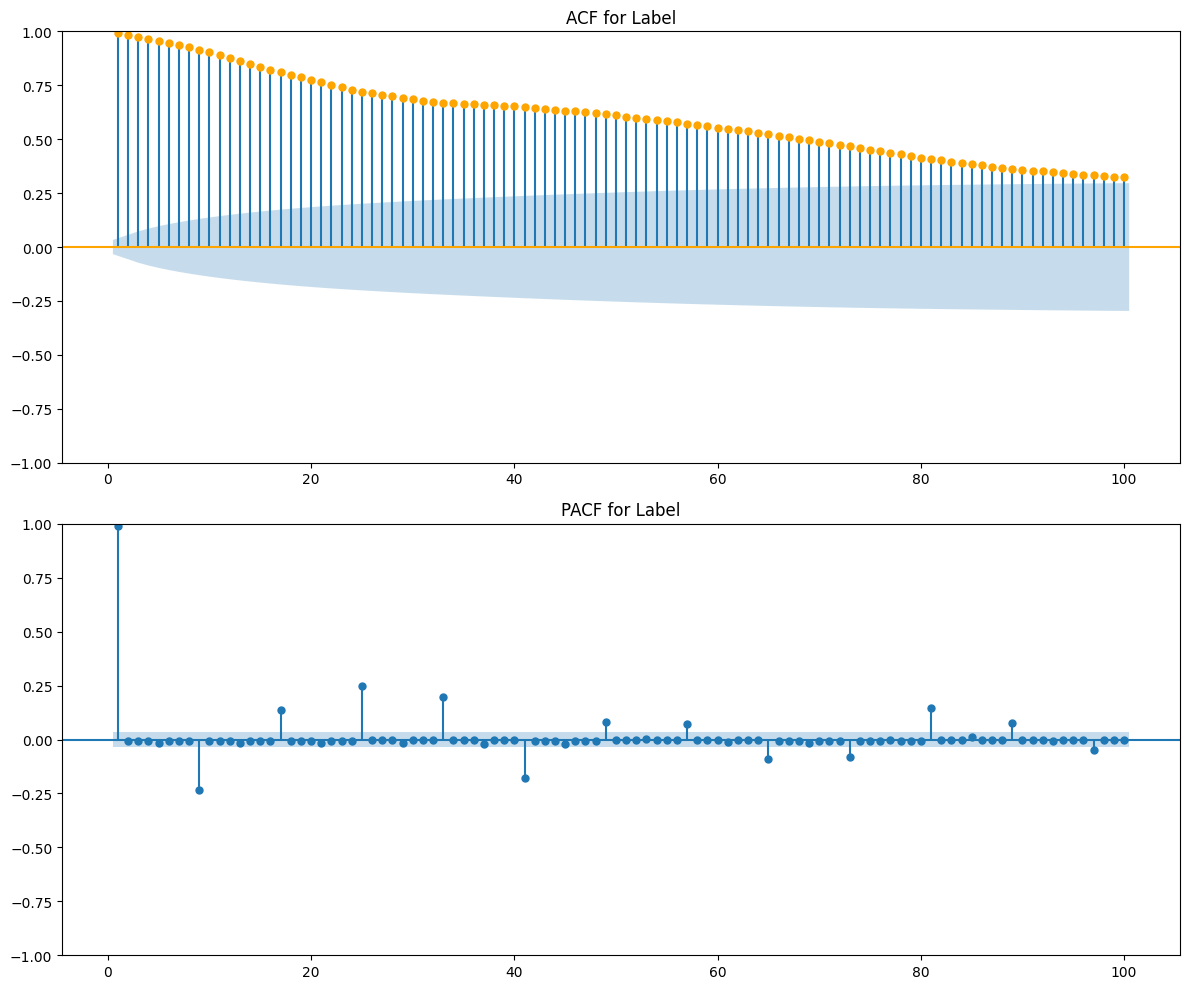

In [87]:
# Plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


plt.figure(figsize=(12, 10))

# ACF Plot
plt.subplot(2, 1, 1)
acf_plot = plot_acf(Arima_test['Label'], lags=100, ax=plt.gca(), title='ACF for Label', zero=False, color = 'Orange')

# PACF Plot
plt.subplot(2, 1, 2)
pacf_plot = plot_pacf(Arima_test['Label'], lags=100, ax=plt.gca(), title='PACF for Label', zero=False)

plt.tight_layout()
plt.show()

In [88]:
Arima_test['Timestamp'] = pd.to_datetime(Arima_test['Timestamp'])
Arima_test.set_index('Timestamp', inplace=True)
train_start = pd.to_datetime('2019-01-01 10:00:00.000')
train_end = pd.to_datetime('2019-01-01 10:09:48.750')
test_end = pd.to_datetime('2019-01-01 10:14:48.750')
train_data =Arima_test.loc[train_start:train_end]
test_data = Arima_test.loc[train_end + pd.Timedelta(seconds=1):test_end]
print(train_data)
print(test_data)

                             Label
Timestamp                         
2019-01-01 10:00:00.000  79.361777
2019-01-01 10:00:00.250  79.361777
2019-01-01 10:00:00.500  79.361777
2019-01-01 10:00:00.750  79.361777
2019-01-01 10:00:01.000  81.381234
...                            ...
2019-01-01 10:09:47.750  71.151145
2019-01-01 10:09:48.000  71.151145
2019-01-01 10:09:48.250  71.151145
2019-01-01 10:09:48.500  71.151145
2019-01-01 10:09:48.750  71.151145

[2356 rows x 1 columns]
                             Label
Timestamp                         
2019-01-01 10:09:49.750  71.659508
2019-01-01 10:09:50.000  71.659508
2019-01-01 10:09:50.250  71.659508
2019-01-01 10:09:50.500  71.659508
2019-01-01 10:09:50.750  71.659508
...                            ...
2019-01-01 10:14:47.750  72.927477
2019-01-01 10:14:48.000  72.927477
2019-01-01 10:14:48.250  72.927477
2019-01-01 10:14:48.500  72.927477
2019-01-01 10:14:48.750  72.927477

[1197 rows x 1 columns]


In [89]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
import time

model = ARIMA(train_data['Label'], order=(9, 0, 0))
start_time = time.time()
results = model.fit()
end_time = time.time()
print(f"Time taken to fit the AR model: {end_time - start_time} seconds")
print(results.summary())

Time taken to fit the AR model: 5.872525691986084 seconds
                               SARIMAX Results                                
Dep. Variable:                  Label   No. Observations:                 2356
Model:                 ARIMA(9, 0, 0)   Log Likelihood               -2281.784
Date:                Mon, 07 Aug 2023   AIC                           4585.569
Time:                        18:59:40   BIC                           4648.981
Sample:                    01-01-2019   HQIC                          4608.660
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.9867      1.657     41.622      0.000      65.738      72.235
ar.L1          0.9964      0.289      3.442      0.001       0.429       

In [90]:
pred_s_date = test_data.index[0]
pred_e_date = test_data.index[-1]

In [91]:
predictions = results.predict(start =pred_s_date, end =pred_e_date )
residuals = test_data - predictions


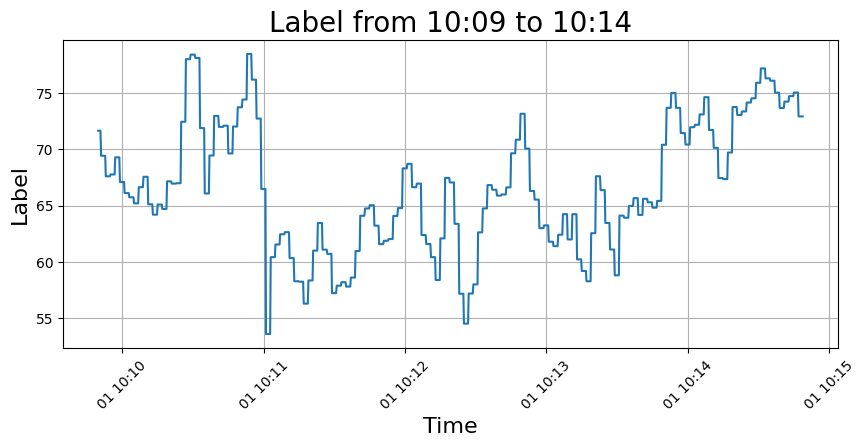

In [92]:
start_time = '2019-01-01 10:09:48.750'
end_time = '2019-01-01 10:14:48.750'
selected_data = test_data[start_time:end_time]
plt.figure(figsize=(10, 4))
plt.plot(selected_data['Label'])
plt.title('Label from 10:09 to 10:14', fontsize=20)
plt.ylabel('Label', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

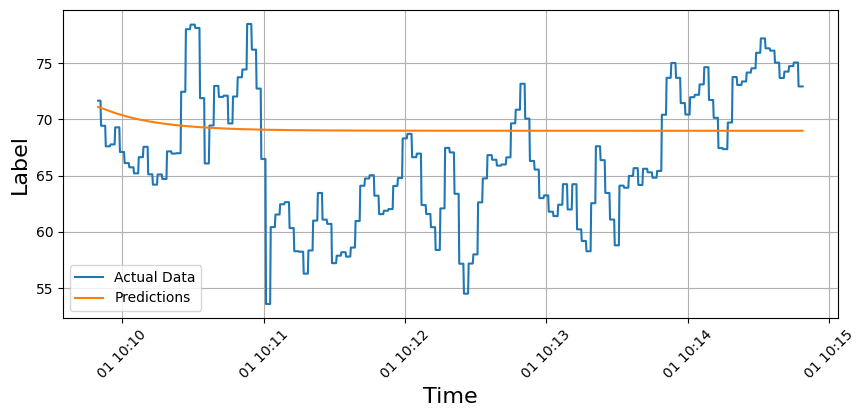

In [93]:
start_time = '2019-01-01 10:09:48.750'
end_time = '2019-01-01 10:14:48.750'

selected_data = test_data[start_time:end_time]
plt.figure(figsize=(10, 4))
plt.plot(selected_data['Label'], label='Actual Data')
plt.plot(predictions[start_time:end_time], label='Predictions')

plt.ylabel('Label', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

This prediction will help to identify potential range of heart rates, if any signals occurs out of the range for a short period, It can be excluded considering it is a false signal. Similarly if the heartrate shows out of the range for a longer duration, we can understand that the subject has changed the activity and will need attention if required.

#Considering all subjects

In [3]:
import requests, zipfile, io
import warnings
warnings.filterwarnings("ignore")
def alldata(zip_file_url):
    req = requests.get(zip_file_url, stream=True)
    z = zipfile.ZipFile(io.BytesIO(req.content))
    all_datafile = [file for file in z.namelist() if file.endswith('.pkl')]
    result_alldata = pd.DataFrame()

    for pkl_file in all_datafile:
        with z.open(pkl_file) as file:
            data_all = pickle.load(file, encoding='latin1')
            signal = pd.DataFrame(data_all["signal"])

            chest_signal = signal["chest"]
            chest_df = pd.DataFrame(chest_signal["ACC"])
            chest_df = chest_df.iloc[::175, :]
            chest_df.columns = ["chest_ACC_x", "chest_ACC_y", "chest_ACC_z"]
            chest_df.reset_index(drop=True, inplace=True)
            chest_df["chest_Resp"] = pd.DataFrame(chest_signal["Resp"]).iloc[::175, :].reset_index(drop=True)
            chest_df["chest_ECG"] = pd.DataFrame(chest_signal["ECG"]).iloc[::175, :].reset_index(drop=True)

            wrist_signal = signal["wrist"]
            wrist_df = pd.DataFrame(wrist_signal["ACC"])
            wrist_df = wrist_df.iloc[::8, :]
            wrist_df.columns = ["wrist_ACC_x", "wrist_ACC_y", "wrist_ACC_z"]
            wrist_df.reset_index(drop=True, inplace=True)

            wrist_df["wrist_EDA"] = pd.DataFrame(wrist_signal["EDA"]).reset_index(drop=True)
            wrist_df["wrist_BVP"] = pd.DataFrame(wrist_signal["BVP"]).iloc[::16, :].reset_index(drop=True)
            wrist_df["wrist_TEMP"] = pd.DataFrame(wrist_signal["TEMP"]).reset_index(drop=True)

            all_df = pd.concat([chest_df, wrist_df], axis=1)

            for k, v in data_all["questionnaire"].items():
                all_df[k] = v

            rpeaks = data_all['rpeaks']
            countof_rpeaks = []
            index = 0
            time = 175
            count = 0

            while index < len(rpeaks):
                rpeak = rpeaks[index]

                if rpeak > time:
                    countof_rpeaks.append(count)
                    count = 0
                    time += 175
                else:
                    count += 1
                    index += 1

            while len(countof_rpeaks) < all_df.shape[0]:
                countof_rpeaks.append(0)

            all_df["Rpeaks"] = countof_rpeaks

            activity_df = pd.DataFrame(data_all["activity"], columns=["Activity"])
            all_df["Activity"] = activity_df.astype(int)

            label_df = pd.DataFrame(np.repeat(data_all["label"], 8, axis=0), columns=["Label"])
            all_df["Label"] = label_df

            all_df["Subject"] = data_all["subject"]

            result_alldata = result_alldata.append(all_df)

    result_alldata.reset_index(drop=True, inplace=True)
    return result_alldata

zip_file_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00495/data.zip"
dataframe_ppg = alldata(zip_file_url)


In [4]:
dataframe_ppg

,chest_ACC_x,chest_ACC_y,chest_ACC_z,chest_Resp,chest_ECG,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_EDA,wrist_BVP,...,WEIGHT,Gender,AGE,HEIGHT,SKIN,SPORT,Rpeaks,Activity,Label,Subject
0,0.9176,-0.0178,-0.0872,7.350159,-0.100479,-0.765625,0.250000,0.593750,0.120438,7.87,...,56.0,f,55,164.0,4,5,0,0,64.282356,S10
1,0.8954,0.0088,-0.1090,11.697388,-0.157425,-0.765625,0.265625,0.578125,0.120438,-9.59,...,56.0,f,55,164.0,4,5,0,0,64.282356,S10
2,0.9138,-0.0520,-0.1086,11.622620,-0.075943,-0.781250,0.250000,0.562500,0.121719,-10.45,...,56.0,f,55,164.0,4,5,0,0,64.282356,S10
3,0.9090,-0.0462,-0.1020,9.483337,-0.068665,-0.781250,0.218750,0.562500,0.119157,11.40,...,56.0,f,55,164.0,4,5,1,0,64.282356,S10
4,0.9102,-0.0642,-0.1166,6.806946,0.017166,-0.781250,0.234375,0.562500,0.121719,4.83,...,56.0,f,55,164.0,4,5,0,0,64.282356,S10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517951,0.9470,-0.0794,-0.1462,1.518250,-0.039688,-0.812500,0.984375,-0.093750,0.102761,-80.15,...,60.0,f,28,167.0,4,5,0,0,NaN,S9
517952,0.8508,-0.0174,-0.1756,1.301575,1.003189,-0.640625,0.296875,-0.609375,0.104042,48.99,...,60.0,f,28,167.0,4,5,1,0,NaN,S9
517953,0.9962,-0.0230,-0.1532,1.683044,0.200272,-0.312500,0.000000,-0.890625,0.101480,57.36,...,60.0,f,28,167.0,4,5,0,0,NaN,S9
517954,0.9714,0.0306,-0.1814,2.107239,-0.077042,-0.359375,0.062500,-0.796875,0.107886,-15.11,...,60.0,f,28,167.0,4,5,0,0,NaN,S9


Analysing each feature

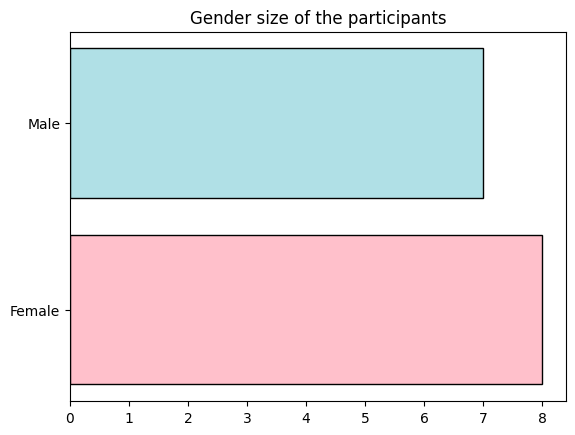

In [5]:
df_ppg = dataframe_ppg.copy()
df_ppg['Gender'] = df_ppg['Gender'].str.strip()
df_ppg.drop_duplicates(subset='Subject', inplace=True)
gender_counts = df_ppg['Gender'].value_counts()
female_count = gender_counts.get('f', 0)
male_count = gender_counts.get('m', 0)
gender_counts_combined = {'Female': female_count, 'Male': male_count}
label_y = ['Female', 'Male']
plt.barh(range(len(gender_counts_combined)), gender_counts_combined.values(), color=['pink', 'powderblue'], edgecolor="black")
plt.yticks(range(len(gender_counts_combined)), label_y)
plt.title('Gender size of the participants')
plt.show()

In [6]:
count_age =df_ppg['AGE'].value_counts()
print(count_age)

21    3
28    3
43    2
25    2
55    1
24    1
26    1
34    1
37    1
Name: AGE, dtype: int64


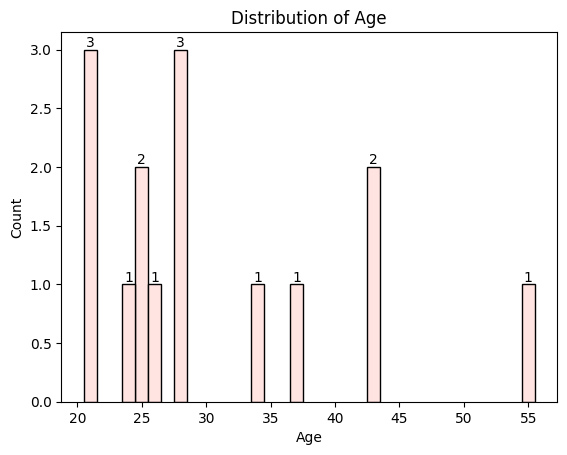

In [7]:
age_range = count_age.index
age_count = count_age.values

plt.bar(age_range, age_count,width = 1.0, color='mistyrose', edgecolor = "black")
for x, y in zip(age_range, age_count):
    plt.text(x, y, str(y), ha='center',va='bottom')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

In [8]:
count_sport = df_ppg['SPORT'].value_counts()
print(count_sport)

5    9
6    2
4    2
1    1
2    1
Name: SPORT, dtype: int64


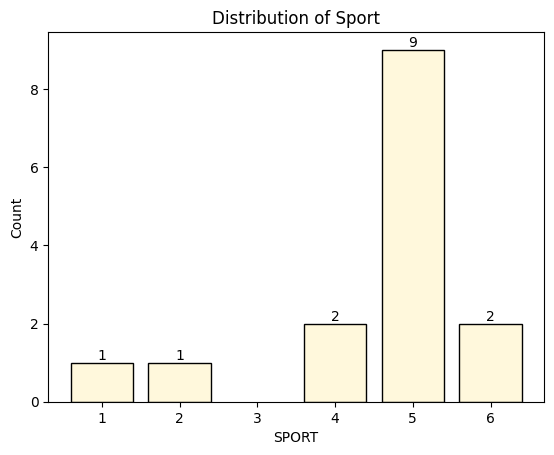

In [9]:
sport_range = count_sport.index
sport_count = count_sport.values

plt.bar(sport_range, sport_count, color='cornsilk', edgecolor = "black")
for x, y in zip(sport_range, sport_count):
    plt.text(x, y, str(y), ha='center',va='bottom')
plt.xlabel('SPORT')
plt.ylabel('Count')
plt.title('Distribution of Sport')
plt.show()

In [10]:
count_skin = df_ppg['SKIN'].value_counts()
print(count_skin)

3    11
4     3
2     1
Name: SKIN, dtype: int64


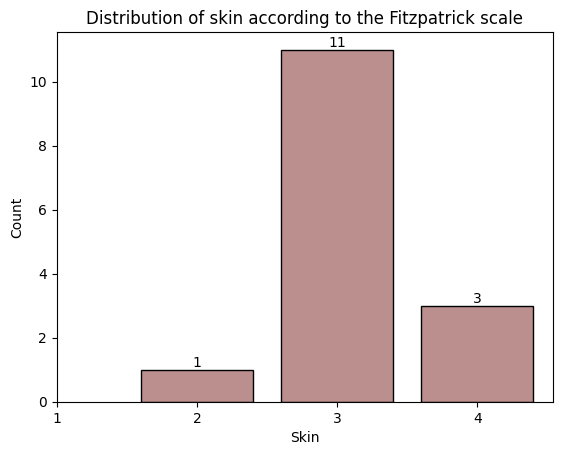

In [11]:
skin_range = count_skin.index
skin_count = count_skin.values

plt.bar(skin_range, skin_count, color='rosybrown', edgecolor = "black")
for x, y in zip(skin_range, skin_count):
    plt.text(x, y, str(y), va='bottom', ha='center')
plt.xlabel('Skin')
plt.ylabel('Count')
plt.title('Distribution of skin according to the Fitzpatrick scale')
plt.xticks([1, 2, 3, 4])
plt.show()

In [12]:
count_WEIGHT = df_ppg['WEIGHT'].value_counts()
print(count_WEIGHT)

70.0     3
60.0     2
56.0     1
62.0     1
105.0    1
63.0     1
67.0     1
79.0     1
78.0     1
80.0     1
57.0     1
58.0     1
Name: WEIGHT, dtype: int64


In [13]:
count_HEIGHT = df_ppg['HEIGHT'].value_counts()
print(count_HEIGHT)

168.0    3
170.0    3
164.0    1
195.0    1
183.0    1
182.0    1
189.0    1
180.0    1
176.0    1
179.0    1
167.0    1
Name: HEIGHT, dtype: int64


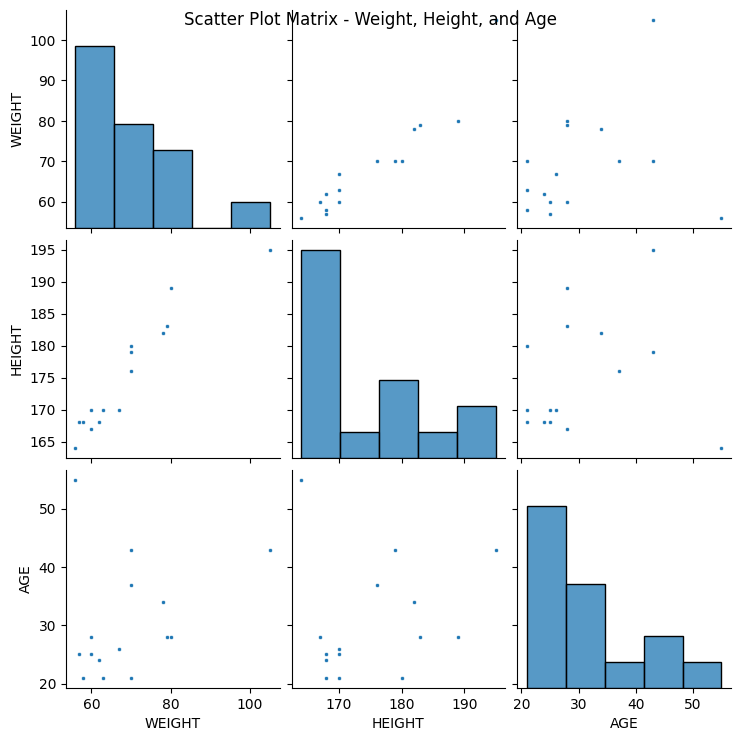

In [14]:
weight_height_age_data = df_ppg[['WEIGHT', 'HEIGHT', 'AGE']]
sns.pairplot(weight_height_age_data, markers='.')
plt.suptitle('Scatter Plot Matrix - Weight, Height, and Age')
plt.show()

In [15]:
print(dataframe_ppg.columns)

Index(['chest_ACC_x', 'chest_ACC_y', 'chest_ACC_z', 'chest_Resp', 'chest_ECG',
       'wrist_ACC_x', 'wrist_ACC_y', 'wrist_ACC_z', 'wrist_EDA', 'wrist_BVP',
       'wrist_TEMP', 'WEIGHT', 'Gender', 'AGE', 'HEIGHT', 'SKIN', 'SPORT',
       'Rpeaks', 'Activity', 'Label', 'Subject'],
      dtype='object')


Activity feature

In [16]:
Activity = pd.DataFrame(dataframe_ppg["Activity"]).astype(int)
Activity.columns = ["Activity"]
print("The Shape of the Activity column is", Activity.shape)
print("The first 10 rows of the Activity column are:")
print(Activity.head(10))

The Shape of the Activity column is (517956, 1)
The first 10 rows of the Activity column are:
   Activity
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0


In [17]:
result_activity = Activity["Activity"].value_counts()
result_activity

0    140332
6    108412
8     68020
5     54748
7     37564
1     36580
4     27832
2     25952
3     18516
Name: Activity, dtype: int64

In [18]:
rename_activity = result_activity.rename(index={0: "No Activity", 1: "Sitting", 2: "Stairs", 3: "Soccer", 4: "Cycling", 5: "Driving", 6: "Lunch", 7: "Walking", 8: "Working"})
rename_activity

No Activity    140332
Lunch          108412
Working         68020
Driving         54748
Walking         37564
Sitting         36580
Cycling         27832
Stairs          25952
Soccer          18516
Name: Activity, dtype: int64

In [19]:
df_a = dataframe_ppg[['Activity']]
df_a

,Activity
0,0
1,0
2,0
3,0
4,0
...,...
517951,0
517952,0
517953,0
517954,0


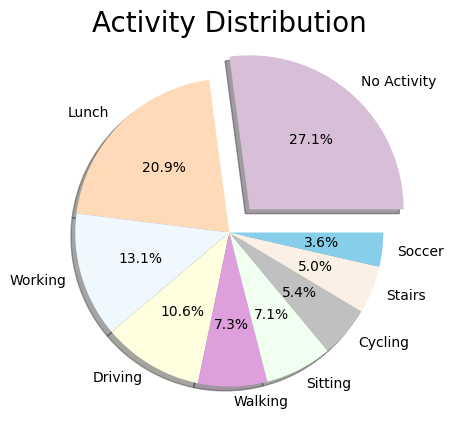

In [20]:
myexplode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0]
plot = rename_activity.plot.pie(figsize=(8, 5), shadow=True, autopct='%1.1f%%', fontsize=10, explode = myexplode, colors=['thistle', 'peachpuff', 'aliceblue', 'lightyellow', 'plum', 'honeydew', 'silver', 'linen', 'skyblue'])
plt.ylabel('')
plt.title('Activity Distribution', fontsize=20)
plt.show()


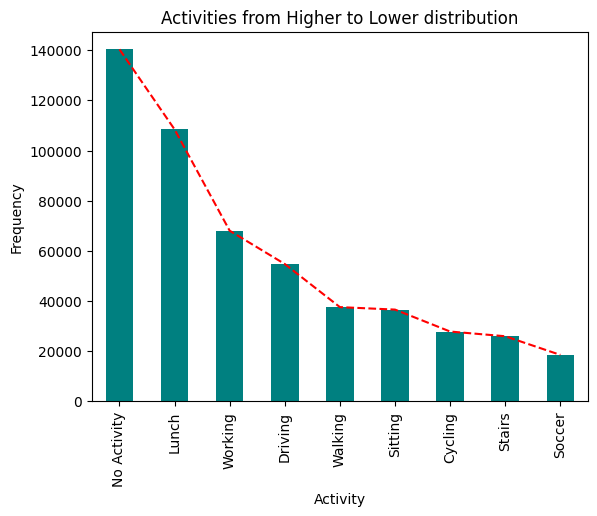

In [21]:
sorted_activity = rename_activity.sort_values(ascending=False)
ax = sorted_activity.plot(kind='bar', color='teal')
ax.set_title('Activities from Higher to Lower distribution')
ax.set_xlabel('Activity')
ax.set_ylabel('Frequency')
x = np.arange(len(sorted_activity))
y = sorted_activity.values
ax.plot(x, y, 'r--')
plt.show()

Label

Label column contains the ECG data ( ground truth data) in 8 seconds window. i.i.e Each window is compressed to give an average value of heartrate in 8 seconds i.e The averaged heartbeats every 8 seconds

In [22]:
num_rows_label_column = dataframe_ppg["Label"].shape[0]
num_nan_values = dataframe_ppg["Label"].isna().sum()
print("Number of rows in the 'Label' column:", num_rows_label_column)
print("Number of NaN values in the 'Label' column:", num_nan_values)

Number of rows in the 'Label' column: 517956
Number of NaN values in the 'Label' column: 380


In [23]:
#filling the NaN rows with mean value
avg_label = np.mean(dataframe_ppg["Label"].dropna())
dataframe_ppg["Label"].fillna(avg_label, inplace=True)


In [24]:
#Rechecking the NaN values
num_nan_values = dataframe_ppg["Label"].isna().sum()
print("Number of NaN values in the 'Label' column:", num_nan_values)

Number of NaN values in the 'Label' column: 0


In [25]:
dataframe_ppg

,chest_ACC_x,chest_ACC_y,chest_ACC_z,chest_Resp,chest_ECG,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_EDA,wrist_BVP,...,WEIGHT,Gender,AGE,HEIGHT,SKIN,SPORT,Rpeaks,Activity,Label,Subject
0,0.9176,-0.0178,-0.0872,7.350159,-0.100479,-0.765625,0.250000,0.593750,0.120438,7.87,...,56.0,f,55,164.0,4,5,0,0,64.282356,S10
1,0.8954,0.0088,-0.1090,11.697388,-0.157425,-0.765625,0.265625,0.578125,0.120438,-9.59,...,56.0,f,55,164.0,4,5,0,0,64.282356,S10
2,0.9138,-0.0520,-0.1086,11.622620,-0.075943,-0.781250,0.250000,0.562500,0.121719,-10.45,...,56.0,f,55,164.0,4,5,0,0,64.282356,S10
3,0.9090,-0.0462,-0.1020,9.483337,-0.068665,-0.781250,0.218750,0.562500,0.119157,11.40,...,56.0,f,55,164.0,4,5,1,0,64.282356,S10
4,0.9102,-0.0642,-0.1166,6.806946,0.017166,-0.781250,0.234375,0.562500,0.121719,4.83,...,56.0,f,55,164.0,4,5,0,0,64.282356,S10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517951,0.9470,-0.0794,-0.1462,1.518250,-0.039688,-0.812500,0.984375,-0.093750,0.102761,-80.15,...,60.0,f,28,167.0,4,5,0,0,89.428670,S9
517952,0.8508,-0.0174,-0.1756,1.301575,1.003189,-0.640625,0.296875,-0.609375,0.104042,48.99,...,60.0,f,28,167.0,4,5,1,0,89.428670,S9
517953,0.9962,-0.0230,-0.1532,1.683044,0.200272,-0.312500,0.000000,-0.890625,0.101480,57.36,...,60.0,f,28,167.0,4,5,0,0,89.428670,S9
517954,0.9714,0.0306,-0.1814,2.107239,-0.077042,-0.359375,0.062500,-0.796875,0.107886,-15.11,...,60.0,f,28,167.0,4,5,0,0,89.428670,S9


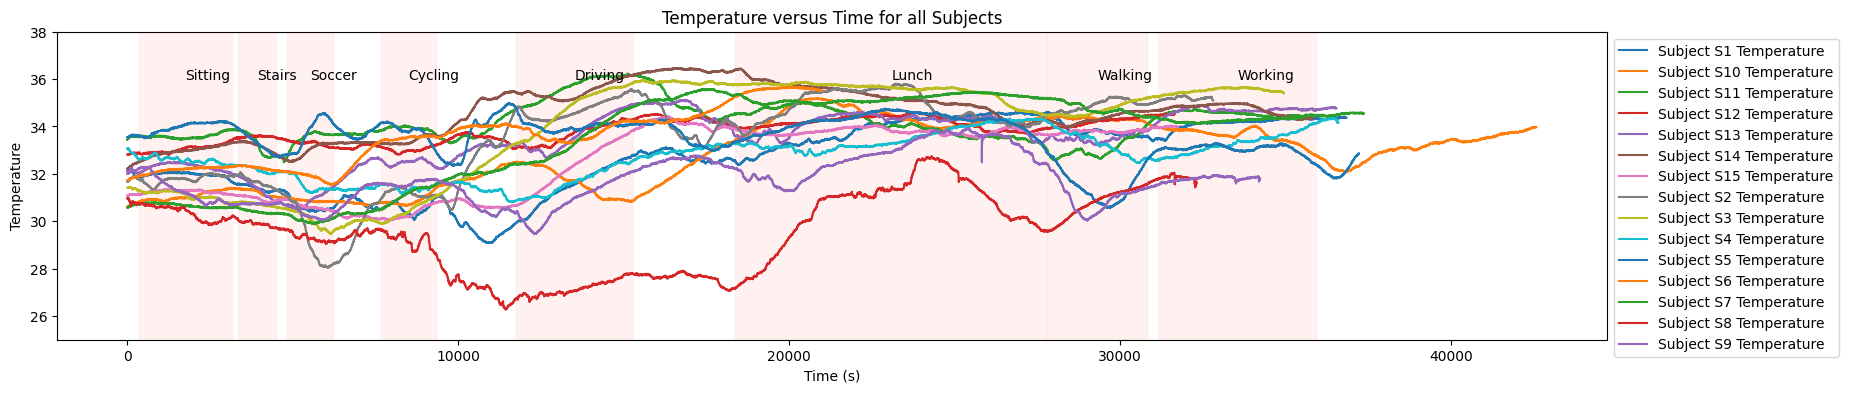

In [31]:
rename_activity = {
    0: 'No Activity',
    1: 'Sitting',
    2: 'Stairs',
    3: 'Soccer',
    4: 'Cycling',
    5: 'Driving',
    6: 'Lunch',
    7: 'Walking',
    8: 'Working'
}

fig, ax = plt.subplots(figsize=(20, 4))
style = dict(size=10, color='k')
ax.set_ylim(top=38, bottom=25)

sub_index = pd.DataFrame()
for sub, data in dataframe_ppg.groupby('Subject'):
    data = data.copy()
    data.index = range(len(data))
    sub_index = pd.concat([sub_index, data])

allsub_data = sub_index.groupby('Subject')

for sub, data in allsub_data:
    ax.plot(data.index, data['wrist_TEMP'], label=f'Subject {sub} Temperature')

Activity_s = dataframe_ppg[dataframe_ppg['Subject']=='S1'].reset_index() #s1's activity is considered in the background as all subjects activity will give a clumsy plot.

x = 0
ini = 0
fin = 0
while(x < len(Activity_s.loc[:, 'Activity'])):
    i_index = Activity_s.loc[x, 'Activity']

    if(i_index != 0):
        ini = x
        while(x < len(Activity_s.loc[:, 'Activity'])):
            if(Activity_s.loc[x, 'Activity'] != i_index):
                break
            else:
                x += 1

        fin = x-1
        sport = rename_activity[i_index]
        plt.axvspan(xmin=ini, xmax=fin, color='mistyrose', alpha=0.5)
        ax.text((ini+fin)//2, 36, sport, **style)
        #ax.set_title('Plot of the temperature during the different activities')
        ini = 0
        fin = 0
    else:
        x += 1

plt.ylabel('Temperature')
plt.xlabel('Time (s)')
plt.title("Temperature versus Time for all Subjects")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


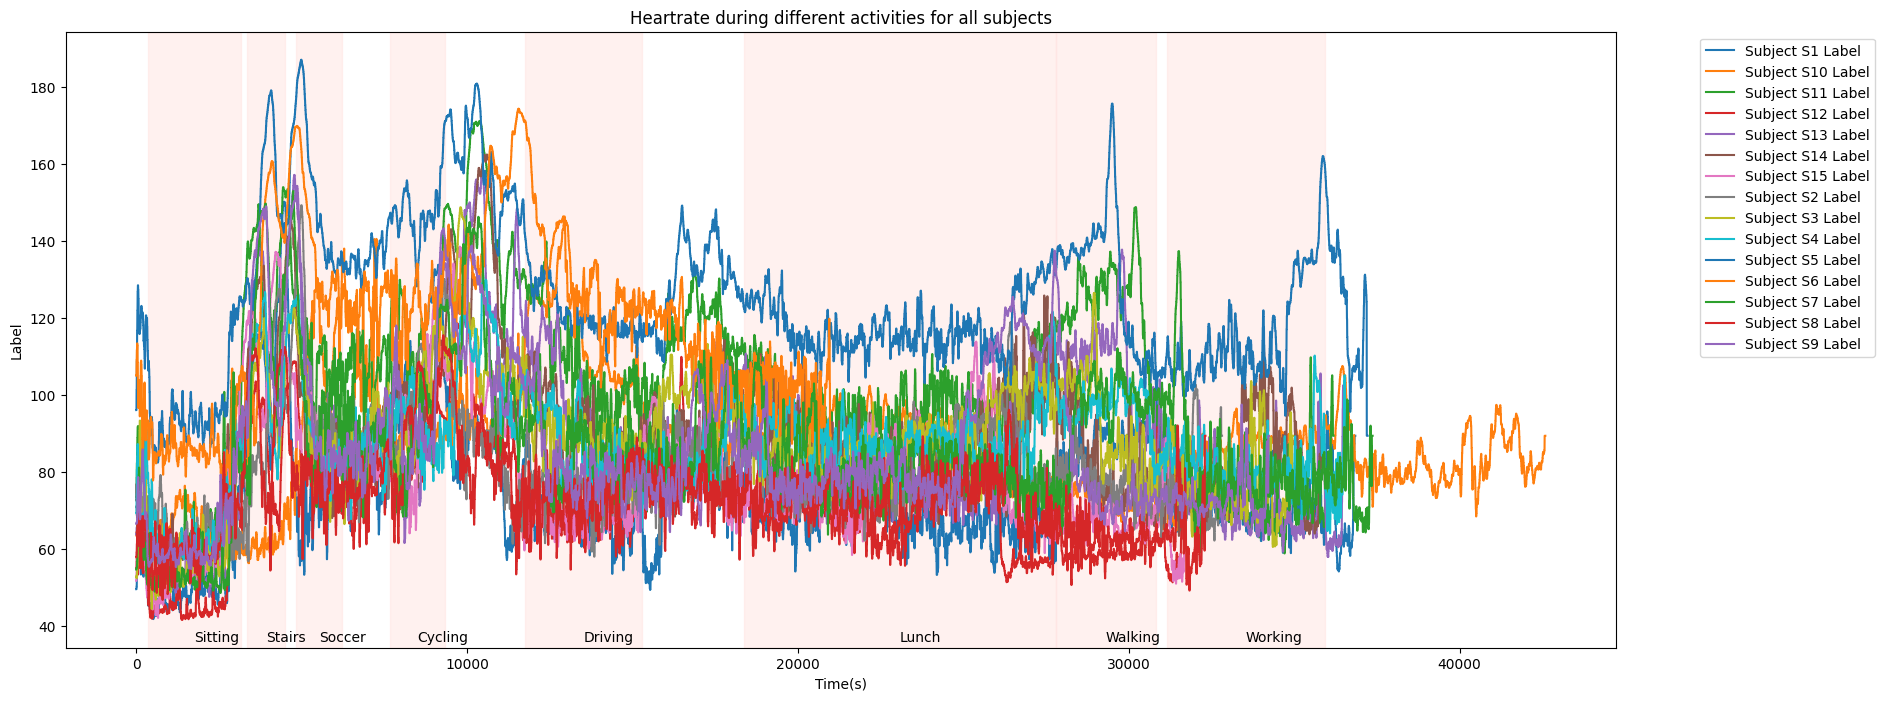

In [30]:
rename_activity = {
    0: 'No Activity',
    1: 'Sitting',
    2: 'Stairs',
    3: 'Soccer',
    4: 'Cycling',
    5: 'Driving',
    6: 'Lunch',
    7: 'Walking',
    8: 'Working'
}


fig, ax = plt.subplots(figsize=(20, 8))
style = dict(size=10, color='k')

sub_index = pd.DataFrame()
for subject, data in dataframe_ppg.groupby('Subject'):
    data = data.copy()
    data.index = range(len(data))
    sub_index =pd.concat([sub_index, data])
allsub_data=sub_index.groupby('Subject')
for subject, data in allsub_data:
    ax.plot(data.index, data['Label'], label=f'Subject {subject} Label')
    Activity_s = dataframe_ppg[dataframe_ppg['Subject']=='S1'].reset_index()#s1's activity is considered in the background as all subjects activity will give a clumsy plot.


x = 0
ini = 0
fin = 0
while(x < len(Activity_s.loc[:, 'Activity'])):
    i_index = Activity_s.loc[x, 'Activity']

    if(i_index != 0):
        ini = x
        while(x < len(Activity_s.loc[:, 'Activity'])):
            if(Activity_s.loc[x, 'Activity'] != i_index):
                break
            else:
                x += 1

        fin = x-1
        sport = rename_activity[i_index]
        plt.axvspan(xmin=ini, xmax=fin, color='mistyrose', alpha=0.5)
        ax.text((ini+fin)//2, 36, sport, **style)
        #ax.set_title('Plot of the temperature during the different activities')
        ini = 0
        fin = 0
    else:
        x += 1

plt.ylabel('Label')
plt.xlabel('Time(s)')
plt.title("Heartrate during different activities for all subjects")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()


In [32]:
corrs = round(dataframe_ppg.corr(),2)
corrs.head()

,chest_ACC_x,chest_ACC_y,chest_ACC_z,chest_Resp,chest_ECG,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_EDA,wrist_BVP,wrist_TEMP,WEIGHT,AGE,HEIGHT,SKIN,SPORT,Rpeaks,Activity,Label
chest_ACC_x,1.00,-0.02,0.25,-0.01,0.03,-0.02,0.06,-0.11,-0.03,0.0,-0.00,-0.13,-0.07,-0.11,0.02,0.05,0.02,-0.05,0.08
chest_ACC_y,-0.02,1.00,-0.07,-0.00,0.01,0.01,0.03,0.03,0.16,0.0,0.09,0.14,0.00,0.09,-0.10,0.02,-0.00,-0.04,0.00
chest_ACC_z,0.25,-0.07,1.00,-0.01,0.00,0.01,0.23,-0.14,-0.09,0.0,-0.12,-0.23,-0.16,-0.16,-0.00,0.12,0.06,-0.13,0.29
chest_Resp,-0.01,-0.00,-0.01,1.00,0.01,0.00,0.00,-0.00,-0.00,0.0,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00
chest_ECG,0.03,0.01,0.00,0.01,1.00,0.00,-0.00,-0.00,-0.00,0.0,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.05,0.00,0.00


In [33]:
corrs


,chest_ACC_x,chest_ACC_y,chest_ACC_z,chest_Resp,chest_ECG,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_EDA,wrist_BVP,wrist_TEMP,WEIGHT,AGE,HEIGHT,SKIN,SPORT,Rpeaks,Activity,Label
chest_ACC_x,1.00,-0.02,0.25,-0.01,0.03,-0.02,0.06,-0.11,-0.03,0.00,-0.00,-0.13,-0.07,-0.11,0.02,0.05,0.02,-0.05,0.08
chest_ACC_y,-0.02,1.00,-0.07,-0.00,0.01,0.01,0.03,0.03,0.16,0.00,0.09,0.14,0.00,0.09,-0.10,0.02,-0.00,-0.04,0.00
chest_ACC_z,0.25,-0.07,1.00,-0.01,0.00,0.01,0.23,-0.14,-0.09,0.00,-0.12,-0.23,-0.16,-0.16,-0.00,0.12,0.06,-0.13,0.29
chest_Resp,-0.01,-0.00,-0.01,1.00,0.01,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00
chest_ECG,0.03,0.01,0.00,0.01,1.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.05,0.00,0.00
wrist_ACC_x,-0.02,0.01,0.01,0.00,0.00,1.00,0.05,0.28,0.06,0.01,0.01,0.08,-0.03,0.07,0.02,0.03,0.03,0.02,0.13
wrist_ACC_y,0.06,0.03,0.23,0.00,-0.00,0.05,1.00,-0.09,0.02,-0.00,-0.11,0.08,-0.00,0.05,-0.04,0.00,0.05,-0.29,0.25
wrist_ACC_z,-0.11,0.03,-0.14,-0.00,-0.00,0.28,-0.09,1.00,0.04,0.00,0.04,0.12,0.01,0.12,-0.00,0.12,-0.03,0.18,-0.13
wrist_EDA,-0.03,0.16,-0.09,-0.00,-0.00,0.06,0.02,0.04,1.00,0.00,0.11,0.18,-0.11,0.22,-0.19,-0.23,0.05,-0.13,0.24
wrist_BVP,0.00,0.00,0.00,0.00,0.00,0.01,-0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.01,0.00,-0.00


<Axes: >

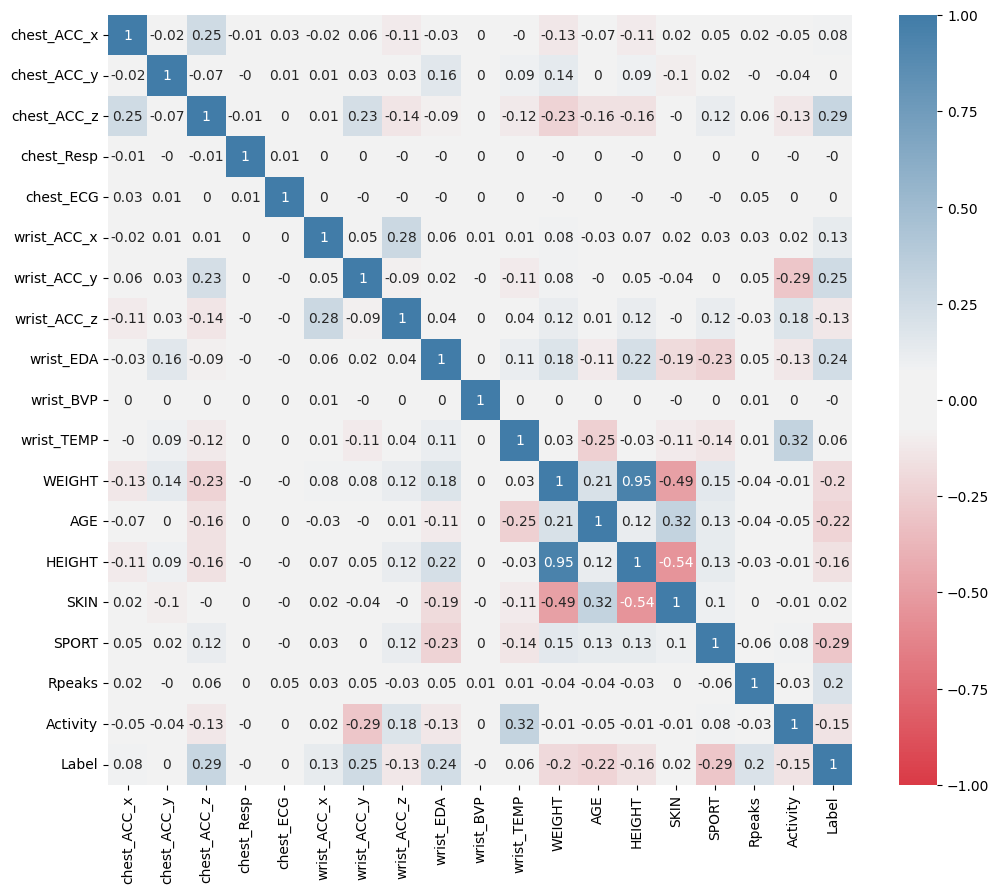

In [34]:
cols = corrs.columns[: int(len(corrs.columns))]
cmap = sns.diverging_palette(10, 240, sep=20, as_cmap=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corrs, annot=True, vmin=-1.0, vmax=1.0, cmap=cmap)

In [35]:
dataframe_ppg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517956 entries, 0 to 517955
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   chest_ACC_x  517956 non-null  float64
 1   chest_ACC_y  517956 non-null  float64
 2   chest_ACC_z  517956 non-null  float64
 3   chest_Resp   517956 non-null  float64
 4   chest_ECG    517956 non-null  float64
 5   wrist_ACC_x  517956 non-null  float64
 6   wrist_ACC_y  517956 non-null  float64
 7   wrist_ACC_z  517956 non-null  float64
 8   wrist_EDA    517956 non-null  float64
 9   wrist_BVP    517956 non-null  float64
 10  wrist_TEMP   517956 non-null  float64
 11  WEIGHT       517956 non-null  float64
 12  Gender       517956 non-null  object 
 13  AGE          517956 non-null  int64  
 14  HEIGHT       517956 non-null  float64
 15  SKIN         517956 non-null  int64  
 16  SPORT        517956 non-null  int64  
 17  Rpeaks       517956 non-null  int64  
 18  Activity     517956 non-

In [36]:
act_activity = {0: "No Activity", 1: "Sitting", 2: "Stairs", 3: "Soccer", 4: "Cycling", 5: "Driving", 6: "Lunch", 7: "Walking", 8: "Working"}

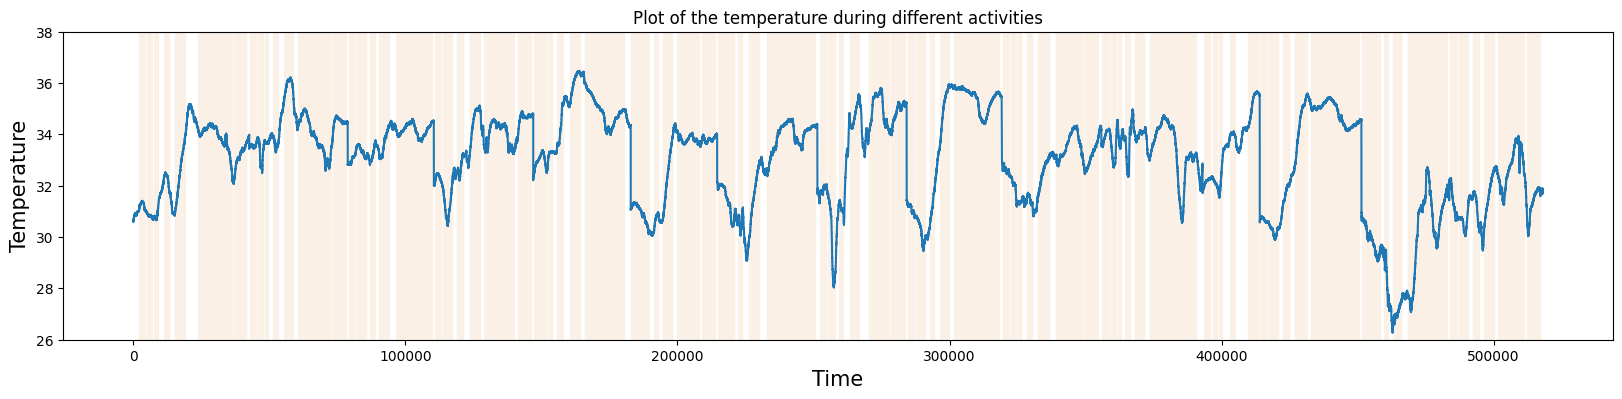

In [37]:
fig, ax = plt.subplots(figsize=(20, 4))

i = 0
x_start = 0
x_end = 0
while i < len(dataframe_ppg.loc[:, 'Activity']):
    sport_index = dataframe_ppg.loc[i, 'Activity']

    if sport_index != 0:
        x_start = i
        while i < len(dataframe_ppg.loc[:, 'Activity']):
            if dataframe_ppg.loc[i, 'Activity'] != sport_index:
                break
            else:
                i += 1

        x_end = i - 1
        plt.axvspan(xmin=x_start + 60, xmax=x_end, color='linen')
        x_start = 0
        x_end = 0

    else:
        i += 1

ax.set_ylim(top=38, bottom=26)
dataframe_ppg.loc[:, 'wrist_TEMP'].plot(ax=ax)
plt.xlabel("Time", fontsize=15)
plt.ylabel("Temperature", fontsize=15)
plt.title('Plot of the temperature during different activities')
plt.show()

Text(0, 0.5, 'Heartrate')

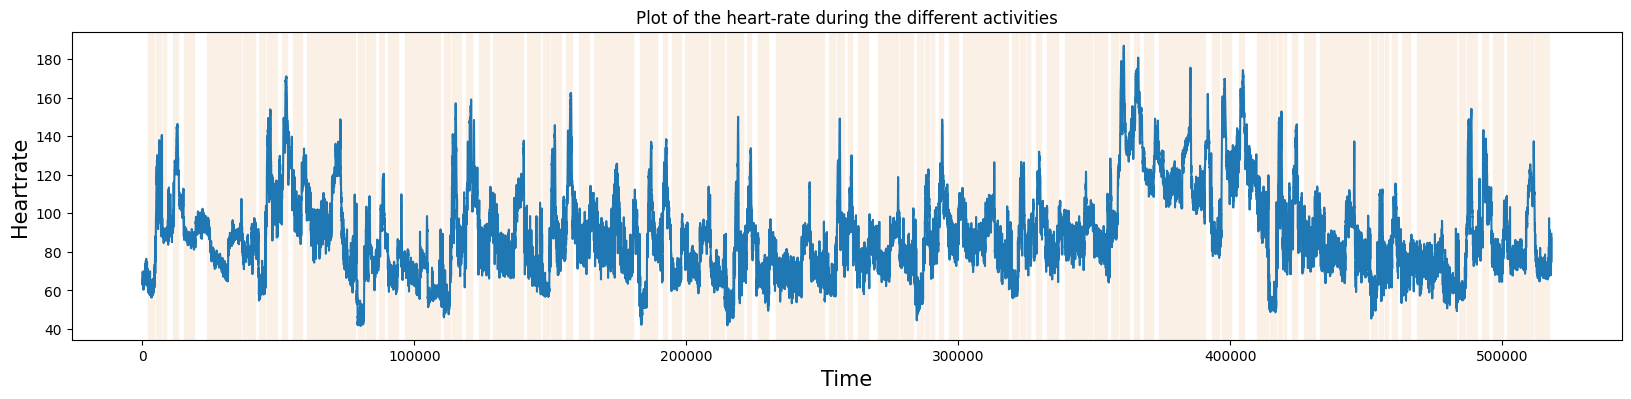

In [38]:
fig, ax = plt.subplots(figsize=(20, 4))
style = dict(size=10, color='k')

i = 0
x_start = 0
x_end = 0
while(i < len(dataframe_ppg.loc[:, 'Activity'])):
    sport_index = dataframe_ppg.loc[i, 'Activity']
    if(sport_index != 0):

        x_start = i
        while(i < len(dataframe_ppg.loc[:, 'Activity'])):
            if(dataframe_ppg.loc[i, 'Activity'] != sport_index):
                break
            else:
                i += 1
        x_end = i-1
        plt.axvspan(xmin=x_start + 60, xmax=x_end, color='linen')
        ax.set_title('Plot of the heart-rate during the different activities')
        x_start = 0
        x_end = 0
    else :
        i += 1
dataframe_ppg.loc[:, 'Label'].plot(ax=ax)
plt.xlabel("Time", fontsize=15)
plt.ylabel("Heartrate", fontsize=15)

Features we're working on, some attributes don't matter to make a prediction.

In [39]:
remove = ["Subject", "WEIGHT", "Gender", "AGE", "HEIGHT", "SKIN", "SPORT", "Activity"]
DF_FE_all = [column for column in dataframe_ppg.columns if column not in remove]
PPG_DF_all = dataframe_ppg[DF_FE_all].copy()

In [40]:
DF_FE_all

['chest_ACC_x',
 'chest_ACC_y',
 'chest_ACC_z',
 'chest_Resp',
 'chest_ECG',
 'wrist_ACC_x',
 'wrist_ACC_y',
 'wrist_ACC_z',
 'wrist_EDA',
 'wrist_BVP',
 'wrist_TEMP',
 'Rpeaks',
 'Label']

In [41]:
#PPGDALIA_data = dataframe_ppg[DF_FE_all]
PPG_DF_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517956 entries, 0 to 517955
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   chest_ACC_x  517956 non-null  float64
 1   chest_ACC_y  517956 non-null  float64
 2   chest_ACC_z  517956 non-null  float64
 3   chest_Resp   517956 non-null  float64
 4   chest_ECG    517956 non-null  float64
 5   wrist_ACC_x  517956 non-null  float64
 6   wrist_ACC_y  517956 non-null  float64
 7   wrist_ACC_z  517956 non-null  float64
 8   wrist_EDA    517956 non-null  float64
 9   wrist_BVP    517956 non-null  float64
 10  wrist_TEMP   517956 non-null  float64
 11  Rpeaks       517956 non-null  int64  
 12  Label        517956 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 51.4 MB


In [42]:
dataframe_ppg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517956 entries, 0 to 517955
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   chest_ACC_x  517956 non-null  float64
 1   chest_ACC_y  517956 non-null  float64
 2   chest_ACC_z  517956 non-null  float64
 3   chest_Resp   517956 non-null  float64
 4   chest_ECG    517956 non-null  float64
 5   wrist_ACC_x  517956 non-null  float64
 6   wrist_ACC_y  517956 non-null  float64
 7   wrist_ACC_z  517956 non-null  float64
 8   wrist_EDA    517956 non-null  float64
 9   wrist_BVP    517956 non-null  float64
 10  wrist_TEMP   517956 non-null  float64
 11  WEIGHT       517956 non-null  float64
 12  Gender       517956 non-null  object 
 13  AGE          517956 non-null  int64  
 14  HEIGHT       517956 non-null  float64
 15  SKIN         517956 non-null  int64  
 16  SPORT        517956 non-null  int64  
 17  Rpeaks       517956 non-null  int64  
 18  Activity     517956 non-

Train-Test Split

In [43]:
X_all = PPG_DF_all.values
Y_all = dataframe_ppg['Activity']

In [44]:
X_train_all, X_test_all, Y_train_all, Y_test_all = train_test_split(X_all, Y_all, test_size=0.25, random_state = 42, stratify = Y_all)

Decision Tree

In [45]:
tree_all = DecisionTreeClassifier(random_state=42)
tree_all.fit(X_train_all, Y_train_all)
Y_pred_tree_all = tree_all.predict(X_test_all)
print("Classification Report is shown below:\n")
print(classification_report(Y_test_all, Y_pred_tree_all))
DT_A_all = accuracy_score(Y_test_all, Y_pred_tree_all)
DT_P_all = precision_score(Y_test_all,Y_pred_tree_all,average='weighted')
DT_R_all = recall_score(Y_test_all, Y_pred_tree_all, average='weighted')
DT_F_all = f1_score(Y_test_all, Y_pred_tree_all, average='weighted')
print("The accuracy score of decision tree is:", DT_A_all)
print("The precision score of decision tree is:", DT_P_all)
print("The recall score of decision tree is:", DT_R_all)
print("The F1 score of decision tree is:", DT_F_all)


Classification Report is shown below:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     35083
           1       0.99      0.99      0.99      9145
           2       0.94      0.93      0.93      6488
           3       0.92      0.91      0.92      4629
           4       0.93      0.93      0.93      6958
           5       0.96      0.96      0.96     13687
           6       0.96      0.96      0.96     27103
           7       0.91      0.90      0.90      9391
           8       0.97      0.97      0.97     17005

    accuracy                           0.95    129489
   macro avg       0.94      0.94      0.94    129489
weighted avg       0.95      0.95      0.95    129489

The accuracy score of decision tree is: 0.9454471036149789
The precision score of decision tree is: 0.9453735616701793
The recall score of decision tree is: 0.9454471036149789
The F1 score of decision tree is: 0.945405388644815


In [46]:
DTcm_all = confusion_matrix(Y_test_all, Y_pred_tree_all)
DTcm_all

array([[32498,   101,   291,   287,   361,   308,   536,   477,   224],
       [   72,  9063,     0,     0,     0,     6,     1,     0,     3],
       [  273,     2,  6057,    23,    59,     7,    11,    49,     7],
       [  329,     1,    20,  4219,    36,     6,    12,     2,     4],
       [  344,     0,    50,    27,  6471,     7,    22,    31,     6],
       [  298,     0,     5,    13,     5, 13112,   161,    22,    71],
       [  450,     0,    10,    15,    23,   174, 26033,   238,   160],
       [  490,     0,    41,     1,    31,    31,   287,  8455,    55],
       [  199,     3,     0,     5,     4,    65,   181,    31, 16517]])

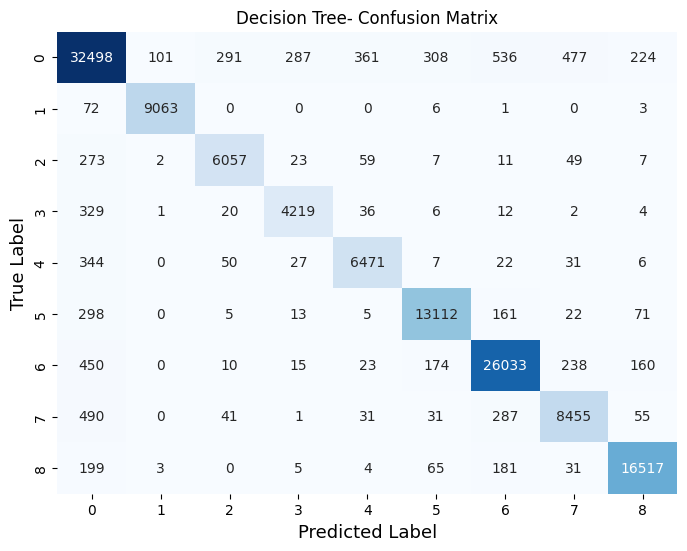

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(DTcm_all, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('True Label',fontsize=13)
plt.xlabel('Predicted Label',fontsize=13)
plt.title('Decision Tree- Confusion Matrix')
plt.show()

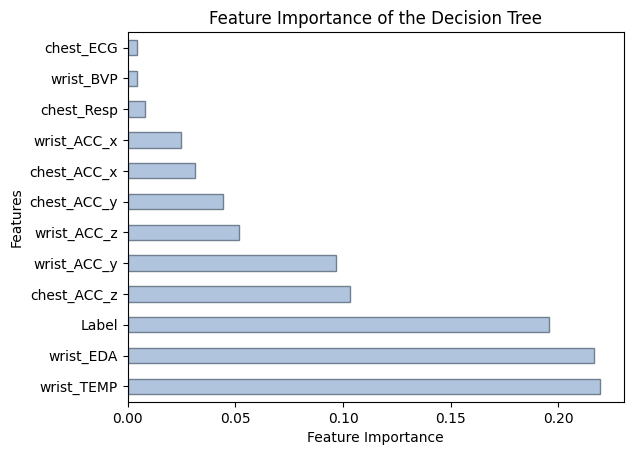

In [48]:
feature_importances_all = pd.Series(tree_all.feature_importances_, index=DF_FE_all)
feature_importances_all.nlargest(12).plot(kind='barh', color = 'lightsteelblue', edgecolor = 'slategrey')
plt.title('Feature Importance of the Decision Tree')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()


SVM

In [49]:
SVM_clf_all = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train_all, Y_train_all)
Y_pred_svm_all = SVM_clf_all.predict(X_test_all)
print("Classification Report is shown below:\n")
print(classification_report(Y_test_all, Y_pred_svm_all))
SVM_A_all = accuracy_score(Y_test_all, Y_pred_svm_all)
SVM_P_all = precision_score(Y_test_all,Y_pred_svm_all,average='weighted')
SVM_R_all = recall_score(Y_test_all,Y_pred_svm_all, average='weighted')
SVM_F_all = f1_score(Y_test_all,Y_pred_svm_all, average='weighted')
print("The accuracy score of SVM is:", SVM_A_all)
print("The precision score of SVM is:", SVM_P_all)
print("The recall score of SVM is:", SVM_R_all)
print("The F1 score of SVM is:", SVM_F_all)

Classification Report is shown below:

              precision    recall  f1-score   support

           0       0.49      0.45      0.47     35083
           1       0.65      0.85      0.74      9145
           2       0.68      0.42      0.52      6488
           3       0.35      0.36      0.35      4629
           4       0.69      0.81      0.74      6958
           5       0.59      0.68      0.63     13687
           6       0.60      0.36      0.45     27103
           7       0.27      0.46      0.34      9391
           8       0.44      0.53      0.48     17005

    accuracy                           0.51    129489
   macro avg       0.53      0.55      0.53    129489
weighted avg       0.53      0.51      0.51    129489

The accuracy score of SVM is: 0.5089930418800053
The precision score of SVM is: 0.5280516127331856
The recall score of SVM is: 0.5089930418800053
The F1 score of SVM is: 0.5062005267454712


In [50]:
SVM_all = confusion_matrix(Y_test_all, Y_pred_svm_all)
SVM_all

array([[15712,  1495,   877,  2111,  1084,  3250,  2415,  6059,  2080],
       [  551,  7816,     0,     0,     0,   117,   243,     7,   411],
       [ 1749,    62,  2731,   161,   857,    75,   180,   644,    29],
       [ 2123,     2,    26,  1661,   192,   190,   305,   105,    25],
       [  678,     1,   178,   215,  5609,    34,   102,   126,    15],
       [ 1713,    47,     2,    59,     3,  9352,   238,   112,  2161],
       [ 4212,   795,     5,   506,   114,   846,  9654,  4354,  6617],
       [ 3279,   177,   184,    12,   236,   224,   652,  4351,   276],
       [ 1834,  1659,     4,    35,    24,  1710,  2335,   381,  9023]])

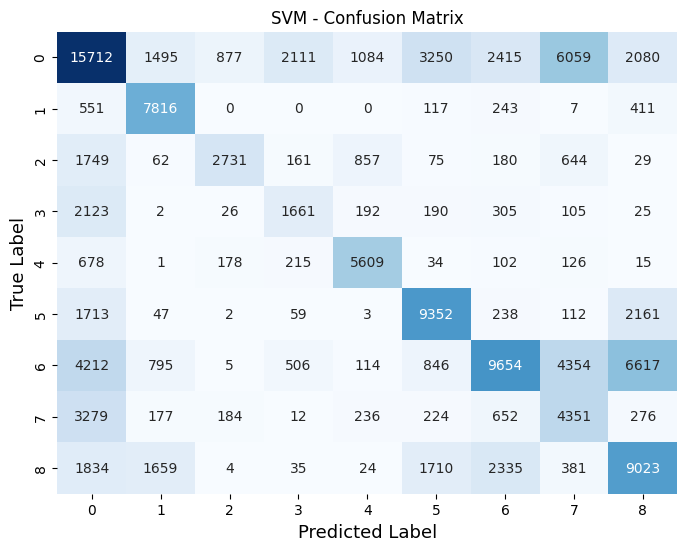

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(SVM_all, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('True Label',fontsize=13)
plt.xlabel('Predicted Label',fontsize=13)
plt.title('SVM - Confusion Matrix')
plt.show()

XGBoost

In [52]:
xgb = XGBClassifier(objective='reg:linear', eta=0.3, colsample_bytree=0.3, learning_rate=0.1, max_depth=10, alpha=10, n_estimators=100, subsample=0.7);
xgb.fit(X_train_all, Y_train_all)
from sklearn.metrics import classification_report
xgb_pred = xgb.predict(X_test_all)
Class_report_all = classification_report(Y_test_all, xgb_pred, target_names=["0", "1","2","3","4","5", "6","7","8"])
print(" summary report of classification:")
print(Class_report_all)


 summary report of classification:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     35083
           1       0.98      0.98      0.98      9145
           2       0.96      0.81      0.88      6488
           3       0.96      0.81      0.88      4629
           4       0.95      0.91      0.93      6958
           5       0.94      0.93      0.94     13687
           6       0.90      0.92      0.91     27103
           7       0.87      0.82      0.85      9391
           8       0.97      0.92      0.94     17005

    accuracy                           0.90    129489
   macro avg       0.93      0.89      0.91    129489
weighted avg       0.91      0.90      0.90    129489



In [53]:
xgcm_all= confusion_matrix(Y_test_all, xgb_pred)
xgcm_all

array([[31781,   140,   174,   111,   207,   448,  1287,   713,   222],
       [  170,  8927,     0,     2,     0,    16,    23,     0,     7],
       [ 1038,     1,  5256,     5,    34,     6,    21,   127,     0],
       [  814,     1,     1,  3727,    49,     5,    31,     0,     1],
       [  587,     0,    10,    17,  6316,     2,    20,     6,     0],
       [  409,     0,     0,     0,     3, 12726,   444,     1,   104],
       [ 1418,     1,     6,    19,    17,   155, 25065,   248,   174],
       [ 1315,     0,    31,     0,    24,    14,   275,  7714,    18],
       [  381,     1,     0,     4,     7,   139,   809,    19, 15645]])

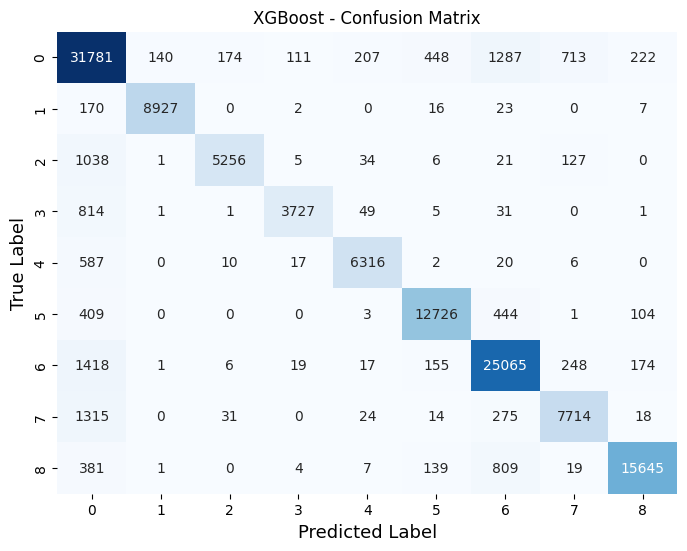

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(xgcm_all, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('True Label',fontsize=13)
plt.xlabel('Predicted Label',fontsize=13)
plt.title('XGBoost - Confusion Matrix')
plt.show()

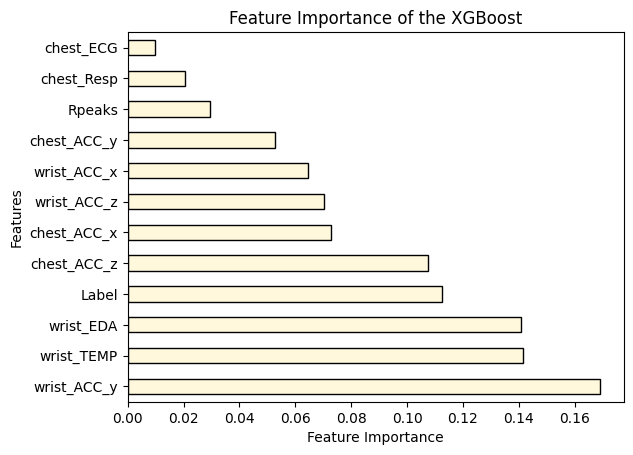

In [55]:
feature_importances_all_x = pd.Series(xgb.feature_importances_, index=DF_FE_all)
feature_importances_all_x.nlargest(12).plot(kind='barh', color = 'cornsilk', edgecolor = 'black')
plt.title('Feature Importance of the XGBoost')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

Random Forest

In [56]:
Randomforest_all  = RandomForestClassifier(n_estimators = 65, random_state = 42)
Randomforest_all.fit(X_train_all, Y_train_all)
RF_predall = Randomforest_all.predict(X_test_all)
print("Classification Report is shown below:\n")
print(classification_report(Y_test_all, RF_predall))
RF_A_all = accuracy_score(Y_test_all, RF_predall)
RF_P_all = precision_score(Y_test_all,RF_predall,average='weighted')
RF_R_all = recall_score(Y_test_all, RF_predall, average='weighted')
RF_F_all = f1_score(Y_test_all,RF_predall, average='weighted')
print("The accuracy score of decision tree is:",RF_A_all)
print("The precision score of decision tree is:", RF_P_all)
print("The recall score of decision tree is:", RF_R_all)
print("The F1 score of decision tree is:", RF_F_all)

Classification Report is shown below:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     35083
           1       1.00      0.99      0.99      9145
           2       0.98      0.90      0.94      6488
           3       0.98      0.91      0.94      4629
           4       0.96      0.94      0.95      6958
           5       0.98      0.98      0.98     13687
           6       0.98      0.97      0.98     27103
           7       0.94      0.92      0.93      9391
           8       0.99      0.98      0.99     17005

    accuracy                           0.96    129489
   macro avg       0.97      0.95      0.96    129489
weighted avg       0.96      0.96      0.96    129489

The accuracy score of decision tree is: 0.9634331873749894
The precision score of decision tree is: 0.963984698686883
The recall score of decision tree is: 0.9634331873749894
The F1 score of decision tree is: 0.9634445699568774


In [57]:
cm_rf_all = confusion_matrix(Y_test_all, RF_predall)
cm_rf_all

array([[33901,    36,    93,    77,   188,   170,   255,   302,    61],
       [   59,  9086,     0,     0,     0,     0,     0,     0,     0],
       [  557,     0,  5817,     3,    26,     2,     7,    76,     0],
       [  381,     0,     1,  4215,    28,     2,     2,     0,     0],
       [  343,     0,    21,    12,  6570,     0,     6,     6,     0],
       [  150,     0,     0,     0,     1, 13437,    92,     0,     7],
       [  469,     0,     1,     3,     8,    39, 26424,   143,    16],
       [  548,     0,     9,     0,    37,     5,   148,  8640,     4],
       [  168,     0,     1,     0,     3,    45,   122,     2, 16664]])

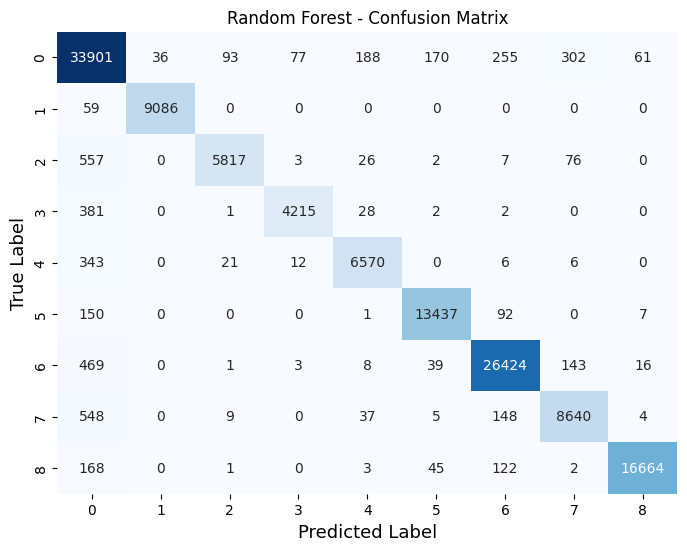

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_all, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('True Label',fontsize=13)
plt.xlabel('Predicted Label',fontsize=13)
plt.title('Random Forest - Confusion Matrix')
plt.show()

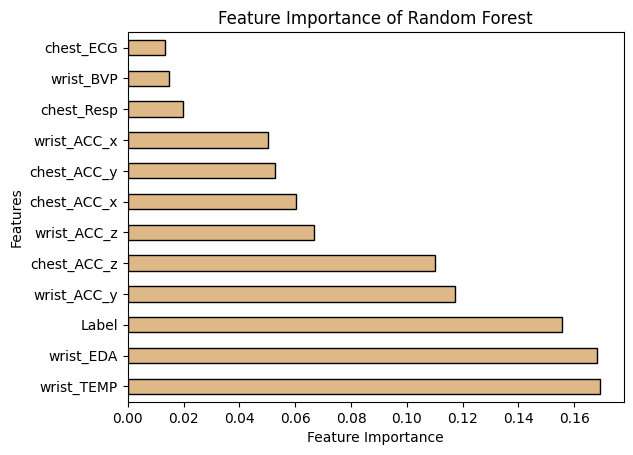

In [59]:
feature_RF_importances = pd.Series(Randomforest_all.feature_importances_, index=DF_FE_all)
feature_RF_importances .nlargest(12).plot(kind='barh', color = 'burlywood', edgecolor ='black')
plt.title('Feature Importance of Random Forest')
plt.ylabel('Features')
plt.xlabel('Feature Importance')
plt.show()

LOGISTIC REGRESSION - SOFTMAX

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
scaler = StandardScaler()
X_train_all = scaler.fit_transform(X_train_all)
X_test_all = scaler.transform(X_test_all)
model_smax_all_lr = LogisticRegression(penalty='l2', C=1, multi_class='multinomial', solver='lbfgs')
model_smax_all_lr.fit(X_train_all, Y_train_all)
Y_predict_softmax_all = model_smax_all_lr.predict(X_test_all)
print("Classification Report is shown below:\n")
print(classification_report(Y_test_all, Y_predict_softmax_all))
LR_A_all = accuracy_score(Y_test_all, Y_predict_softmax_all)
LR_P_all = precision_score(Y_test_all, Y_predict_softmax_all, average='weighted')
LR_R_all = recall_score(Y_test_all, Y_predict_softmax_all, average='weighted')
LR_F_all = f1_score(Y_test_all, Y_predict_softmax_all, average='weighted')
print("The accuracy score of softmax regression is:", LR_A_all)
print("The precision score of softmax regression is:", LR_P_all)
print("The recall score of softmax regression is:", LR_R_all)
print("The F1 score of softmax regression is:", LR_F_all)

Classification Report is shown below:

              precision    recall  f1-score   support

           0       0.51      0.63      0.56     35083
           1       0.74      0.76      0.75      9145
           2       0.68      0.54      0.60      6488
           3       0.49      0.20      0.29      4629
           4       0.78      0.77      0.78      6958
           5       0.68      0.66      0.67     13687
           6       0.60      0.64      0.62     27103
           7       0.35      0.15      0.20      9391
           8       0.51      0.49      0.50     17005

    accuracy                           0.58    129489
   macro avg       0.59      0.54      0.55    129489
weighted avg       0.57      0.58      0.57    129489

The accuracy score of softmax regression is: 0.5794855161442285
The precision score of softmax regression is: 0.5730928230196962
The recall score of softmax regression is: 0.5794855161442285
The F1 score of softmax regression is: 0.5688055950638272


In [68]:
cm_LR_all = confusion_matrix(Y_test_all,Y_predict_softmax_all )
cm_LR_all

array([[22222,  1229,   886,   499,   756,  2197,  3552,  2049,  1693],
       [  420,  6940,     0,     0,     0,   102,   738,     0,   945],
       [ 2252,    55,  3503,    11,   355,    36,    85,   166,    25],
       [ 3326,     5,     8,   933,   226,    37,    93,     0,     1],
       [ 1106,     0,   283,    83,  5384,    12,    84,     5,     1],
       [ 1715,     6,     1,    45,     1,  9024,  1295,     6,  1594],
       [ 5116,   111,     0,   324,    83,   221, 17257,   332,  3659],
       [ 5784,    13,   459,     4,   125,   168,  1218,  1368,   252],
       [ 1719,   971,     5,     2,     5,  1521,  4343,    33,  8406]])

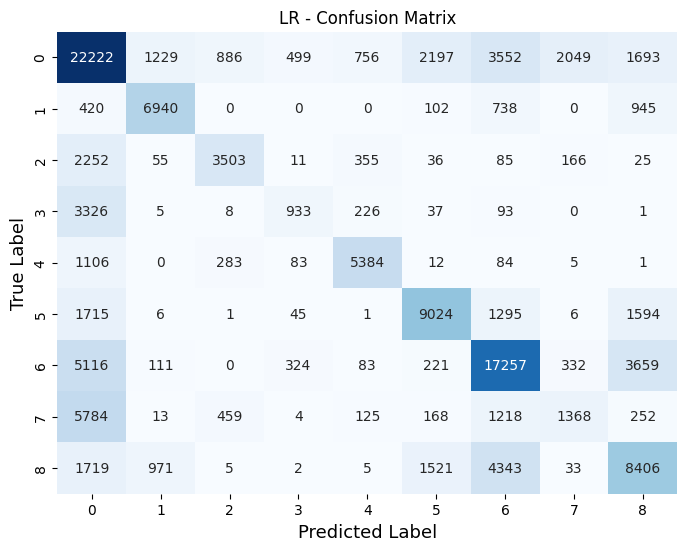

In [69]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_LR_all, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('True Label',fontsize=13)
plt.xlabel('Predicted Label',fontsize=13)
plt.title('LR - Confusion Matrix')
plt.show()

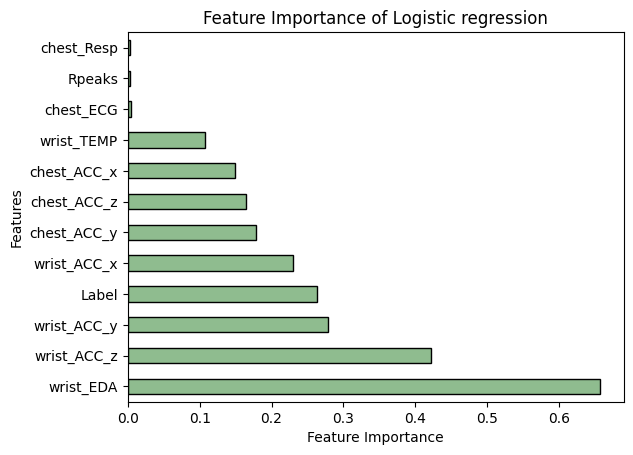

In [71]:
feature_LR_importances_all = pd.Series(abs(model_smax_all_lr.coef_[0]), index=DF_FE_all)
feature_LR_importances_all.nlargest(12).plot(kind='barh', color = 'DarkSeaGreen', edgecolor = 'black')
plt.title('Feature Importance of Logistic regression')
plt.ylabel('Features')
plt.xlabel('Feature Importance')
plt.show()

Comparision Of models

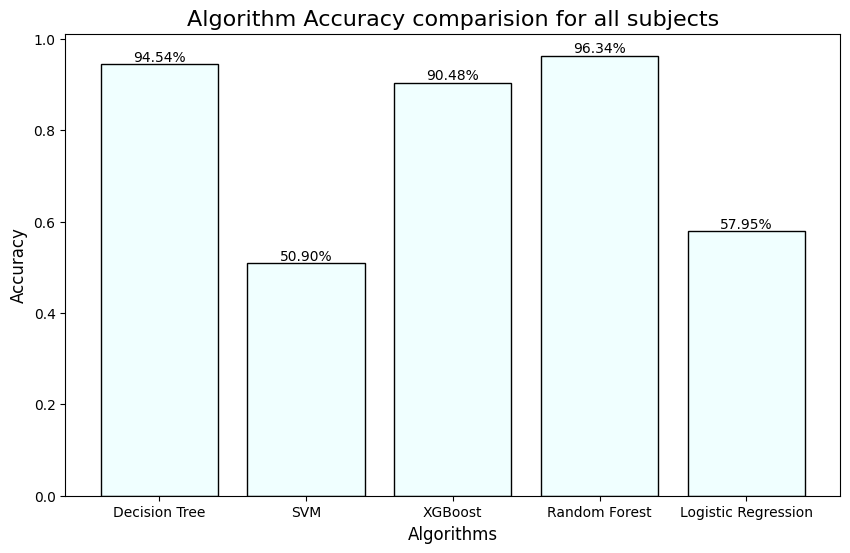

In [72]:
scores_algo = [DT_A_all,SVM_A_all, accuracy_score(xgb_pred, Y_test_all), RF_A_all, LR_A_all]
algorithms = ['Decision Tree', 'SVM', 'XGBoost', 'Random Forest', 'Logistic Regression']
plt.figure(figsize=(10, 6))
algo = plt.bar(algorithms, scores_algo, color='azure', edgecolor ='black')
for algos, score_algo in zip(algo, scores_algo):
    height = algos.get_height()
    plt.text(algos.get_x() + algos.get_width() / 2, height, f'{score_algo*100:.2f}%', ha='center', va='bottom')
plt.xlabel('Algorithms', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Algorithm Accuracy comparision for all subjects', fontsize=16)
plt.show()